# Банки — Сегментация пользователей по потреблению
**Описание проекта:**

Для банка «Метанпромбанк» необходима срочная аналитика оттока клиентов. Требуется выяснить как клиенты пользуются услугами банка и составить портрет клиентов, которые склонны уходить из банка.

**Задача:**

Проанализировать клиентов регионального банка «Метанпром», сегментировать его пользователей по количеству потребляемых продуктов, при этом обратить особое внимание на отток.

По итогам исследования подготавливается  презентация в формате **pdf**.

**План исследования:**

1) **Изучение общей информации. Подготовка данных.**

    1.1) Загрузить датасет с данными bank_dataset.csv;

    1.2) Провести первичный осмотр ;

    1.3) Изучить общую информацию;

2) **Предобработка данных:**
    
    2.1) Переименовать названия столбцов - привести их к единому стандарту;

    2.2) Исследовать типы данных;

    2.3) Проверить данные на наличие дубликатов;

    2.4) Исследовать пропущенные значения;

    2.5) Изменить типы данных;

    2.6) Удалить дубликаты;

    2.7) Заменить или удалить пропуски если нужно;

    2.8) Вывод;

3) **Провести исследовательский анализ данных, в том числе:**

    3.1) Провести общий статистический анализ данных;

    3.2) Построить графики распределения показателей;

    3.3) Построить корреляционною матрицу и матрицу диаграмм рассеяния;

    3.4) Вывод;

4) **Сегментировать пользователей на основе количества потребляемых продуктов (от 1 до 4);**

5) **Сформулировать и проверить статистические гипотезы:**
    
    5.1) Проверить гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

    5.2) Проверить гипотезы различия баллов кредитного скоринга между клиентами с разным количеством используемых продуктов (1-2; 1-3; 1-4; 2-3; 2-4 и 3-4).
    
    5.3) Проверить гипотезу различия баллов возраста ушедших и оставшихся клиентов:

    5.3) Вывод;


6) **Заключение:**

    6.1) Выводы;

    6.2) Рекомендации;

    6.3) Презентация.

### Дашборд

Набор №1

1. Постройте диаграмму, отражающую количество клиентов в зависимости от числа используемых продуктов.
2. Добавьте индикатор процента ушедших клиентов.
3. Добавьте фильтр дашборда по городу.

**Дашборд**

https://public.tableau.com/app/profile/ramil5799/viz/_16780585006110/Sheet1

**Презентация:**

https://drive.google.com/file/d/1WLAUN0VO2ibqy9Y6EfKMGaPsJJnrjSTh/view?usp=share_link

**Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import math
import plotly.express as px
from plotly import graph_objects as go
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import plotly.subplots as sp
import matplotlib.patches as mpatches
from matplotlib.ticker import NullFormatter, FormatStrFormatter,ScalarFormatter
from IPython.display import Image
from IPython.display import Markdown
import nbformat
import re
import gdown

from io import BytesIO
import requests

import warnings
warnings.filterwarnings("ignore")

## Оглавление

In [5]:
def generate_table_of_contents(notebook_path):
    notebook_url = 'https://drive.google.com/uc?id=' + notebook_path.split('/')[-2]
    gdown.download(notebook_url, 'notebook.ipynb', quiet=True)

    with open('notebook.ipynb', 'r', encoding='utf-8') as file:
        notebook = nbformat.read(file, nbformat.NO_CONVERT)

    table_of_contents = []
    heading_numbers = [0, 0, 0, 0, 0, 0]  # Начальные значения номеров для разных уровней заголовков

    for cell in notebook['cells']:
        if cell['cell_type'] == 'markdown':
            source = cell['source']
            headers = re.findall(r'^(#+)\s+(.*)$', source, flags=re.MULTILINE)

            for header in headers:
                level = len(header[0])
                title = header[1].strip()

                link = '-'.join(re.findall(r'\w+', title.lower()))
                indentation = '&nbsp;' * 2 * (level - 1)
                line_break = '\n' + '&nbsp;' * 2 * level

                heading_numbers[level - 1] += 1
                heading_number_str = '.'.join(str(num) for num in heading_numbers[:level])

                colab_link = notebook_path + f'#scrollTo={link}'
                table_of_contents.append(f'{line_break}- {heading_number_str} {title}')

    markdown_output= '\n'.join(table_of_contents)
    display(Markdown(markdown_output))


# Укажите ссылку на ваш файл на Google Диске
notebook_path = 'https://drive.google.com/file/d/1nExm82KkrbpRaEOxfbfDAbCJA4UUIDfa/view?usp=sharing'

# Генерирование оглавления
table_of_contents = generate_table_of_contents(notebook_path)
# Отображение оглавления


&nbsp;&nbsp;- 1 Банки — Сегментация пользователей по потреблению

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.0.1 Дашборд

&nbsp;&nbsp;&nbsp;&nbsp;- 1.1 Оглавление

&nbsp;&nbsp;&nbsp;&nbsp;- 1.2 Изучение общей информации. Подготовка данных.

&nbsp;&nbsp;&nbsp;&nbsp;- 1.3 Предобработка данных:

&nbsp;&nbsp;&nbsp;&nbsp;- 1.4 Исследовательский анализ данных:

&nbsp;&nbsp;&nbsp;&nbsp;- 1.5 Сегментируем пользователей по количеству продуктов:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.5.2 Рассмотрим пользователей по распределению банковского скоринга:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.5.3 Рассмотрим пользователей по распределению возраста:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.5.4 Рассмотрим пользователей по количества объектов собственности у них:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.5.5 Рассмотрим пользователей по их балансу:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.5.6 Рассмотрим пользователей по их расчетной зарплате:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.5.7 Исследуем катеогриальные значения. Рассмотрим пользователей по полу:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.5.8 Рассмотрим пользователей по наличию кредитной карты:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.5.9 Рассмотрим пользователей по статусу лояльности:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.5.10 Рассмотрим пользователей которые живут в Рыбинске и тех кто нет:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.5.11 Рассмотрим пользователей которые живут в Ростове Великом и тех кто нет:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.5.12 Рассмотрим пользователей которые живут в Ярославле и тех кто нет:

&nbsp;&nbsp;&nbsp;&nbsp;- 1.6 Проверить статистические гипотезы

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.6.13 Проверить гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.6.14 Проверить гипотезу различия баллов кредитного скоринга между клиентами с разным количеством используемых продуктов (1-2; 1-3; 1-4; 2-3; 2-4 и 3-4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.6.15 Проверим гипотезу различия возраста ушедших и оставшихся клиентов:

&nbsp;&nbsp;&nbsp;&nbsp;- 1.7 Заключение:

**Данные:**

Один датасет представлен в различных хранилищах:

* [bank_dataset.csv](https://disk.yandex.ru/d/JVAJ9uxtV1uydQ)
* https://docs.google.com/spreadsheets/d/1DFY94cPtm0xNNNUyU_jACyA3jM35VMHTR2FP1o55Iaw/edit?usp=share_link

## Изучение общей информации. Подготовка данных.

**Выгрузим исходную таблицу:**

In [ ]:
spreadsheet_id = '1DFY94cPtm0xNNNUyU_jACyA3jM35VMHTR2FP1o55Iaw'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content))
data

userid  score            City Gender  Age  Objects    Balance  \
0     15677338    619       Ярославль      Ж   42        2        NaN   
1     15690047    608         Рыбинск      Ж   41        1   83807.86   
2     15662040    502       Ярославль      Ж   42        8  159660.80   
3     15744090    699       Ярославль      Ж   39        1        NaN   
4     15780624    850         Рыбинск      Ж   43        2  125510.82   
...        ...    ...             ...    ...  ...      ...        ...   
9995  15648965    771       Ярославль      М   39        5        NaN   
9996  15612628    516       Ярославль      М   35       10   57369.61   
9997  15627268    709       Ярославль      Ж   36        7        NaN   
9998  15725091    772  Ростов Великий      М   42        3   75075.31   
9999  15671055    792       Ярославль      Ж   28        4  130142.79   

      Products  CreditCard  Loyalty  estimated_salary  Churn  
0            1           1        1         101348.88      1  
1            1           0        1         112542.58      0  
2            3           1        0         113931.57      1  
3            2           0        0          93826.63      0  
4            1           1        1          79084.10      0  
...        ...         ...      ...               ...    ...  
9995         2           1        0          96270.64      0  
9996         1           1        1         101699.77      0  
9997         1           0        1          42085.58      1  
9998         2           1        0          92888.52      1  
9999         1           1        0          38190.78      0  

[10000 rows x 12 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
data.describe(include='all').round(2)

userid     score gender       age   objects    balance  products  \
count      10000.00  10000.00  10000  10000.00  10000.00    6383.00  10000.00   
unique          NaN       NaN      2       NaN       NaN        NaN       NaN   
top             NaN       NaN      М       NaN       NaN        NaN       NaN   
freq            NaN       NaN   5457       NaN       NaN        NaN       NaN   
mean    15733676.57    650.53    NaN     38.92      5.01  119827.49      1.53   
std        71936.19     96.65    NaN     10.49      2.89   30095.06      0.58   
min     15608437.00    350.00    NaN     18.00      0.00    3768.69      1.00   
25%     15671264.25    584.00    NaN     32.00      3.00  100181.98      1.00   
50%     15733474.00    652.00    NaN     37.00      5.00  119839.69      1.00   
75%     15795969.75    718.00    NaN     44.00      7.00  139512.29      2.00   
max     15858426.00    850.00    NaN     92.00     10.00  250898.09      4.00   

        creditcard   loyalty  estimated_salary    churn  gender_М  \
count     10000.00  10000.00          10000.00  10000.0  10000.00   
unique         NaN       NaN               NaN      NaN       NaN   
top            NaN       NaN               NaN      NaN       NaN   
freq           NaN       NaN               NaN      NaN       NaN   
mean          0.71      0.52         100090.24      0.2      0.55   
std           0.46      0.50          57510.49      0.4      0.50   
min           0.00      0.00             11.58      0.0      0.00   
25%           0.00      0.00          51002.11      0.0      0.00   
50%           1.00      1.00         100193.92      0.0      1.00   
75%           1.00      1.00         149388.25      0.0      1.00   
max           1.00      1.00         199992.48      1.0      1.00   

        city_Ростов_В  city_Рыбинск  city_Ярославль  
count        10000.00      10000.00         10000.0  
unique            NaN           NaN             NaN  
top               NaN           NaN             NaN  
freq              NaN           NaN             NaN  
mean             0.25          0.25             0.5  
std              0.43          0.43             0.5  
min              0.00          0.00             0.0  
25%              0.00          0.00             0.0  
50%              0.00          0.00             1.0  
75%              1.00          0.00             1.0  
max              1.00          1.00             1.0

Сделаме функцию для отображения названия таблиц:

In [ ]:
def table_name(name):
    name_length=len(name)
    print('_'*name_length)
    print(name+':')
    print('- '*int((name_length/2)))

In [ ]:
table_name('Выведем таблицу c типами данных колонок')
pd.DataFrame({'columns_type':data.dtypes})

_______________________________________
Выведем таблицу c типами данных колонок:
- - - - - - - - - - - - - - - - - - - 


columns_type
userid                  int64
score                   int64
City                   object
Gender                 object
Age                     int64
Objects                 int64
Balance               float64
Products                int64
CreditCard              int64
Loyalty                 int64
estimated_salary      float64
Churn                   int64

**ВЫВОД:**

**Вывели общую таблицу с данными клиентов банка. Вывели общую информацию о данных. Вывели отдельную таблицу с типами данных в колонках.**


## Предобработка данных:

Переименуем названия столбцов - приведем их к нижнему регистру:

In [ ]:
data.columns=data.columns.str.lower()
data.head(1)

userid  score       city gender  age  objects  balance  products  \
0  15677338    619  Ярославль      Ж   42        2      NaN         1   

   creditcard  loyalty  estimated_salary  churn  
0           1        1         101348.88      1

In [ ]:
print('Количество дубликатов во всем датасете равно',data.duplicated().sum())

Количество дубликатов во всем датасете равно 0


In [ ]:
print(data['gender'].unique())
print(data['gender'].nunique())

['Ж' 'М']
2


In [ ]:
dup=pd.DataFrame({'city':data['city'].unique(),'gender':['Ж','М',None]})
for x in ['creditcard','loyalty','churn']:
    dup.loc[0,x]=data[x].unique()[0]
    dup.loc[1,x]=data[x].unique()[1]
dup

city gender  creditcard  loyalty  churn
0       Ярославль      Ж         1.0      1.0    1.0
1         Рыбинск      М         0.0      0.0    0.0
2  Ростов Великий   None         NaN      NaN    NaN

Применим one-hot кодировку. Оставим один закодированный столбец для пола - gender_М.

In [ ]:
data['gender_ctrl_c']=data['gender']
data=pd.get_dummies(data,columns=['gender_ctrl_c'],drop_first=True)
data=pd.get_dummies(data,columns=['city'],drop_first=False)
data. rename(columns = {'gender_ctrl_c_М':'gender_М', 'city_Ростов Великий':'city_Ростов_В'}, inplace = True )
data.head(10)

userid  score gender  age  objects    balance  products  creditcard  \
0  15677338    619      Ж   42        2        NaN         1           1   
1  15690047    608      Ж   41        1   83807.86         1           0   
2  15662040    502      Ж   42        8  159660.80         3           1   
3  15744090    699      Ж   39        1        NaN         2           0   
4  15780624    850      Ж   43        2  125510.82         1           1   
5  15616748    645      М   44        8  113755.78         2           1   
6  15635267    822      М   50        7        NaN         2           1   
7  15698884    376      Ж   29        4  115046.74         4           1   
8  15835101    501      М   44        4  142051.07         2           0   
9  15635125    684      М   27        2  134603.88         1           1   

   loyalty  estimated_salary  churn  gender_М  city_Ростов_В  city_Рыбинск  \
0        1         101348.88      1         0              0             0   
1        1         112542.58      0         0              0             1   
2        0         113931.57      1         0              0             0   
3        0          93826.63      0         0              0             0   
4        1          79084.10      0         0              0             1   
5        0         149756.71      1         1              0             1   
6        1          10062.80      0         1              0             0   
7        0         119346.88      1         0              1             0   
8        1          74940.50      0         1              0             0   
9        1          71725.73      0         1              0             0   

   city_Ярославль  
0               1  
1               0  
2               1  
3               1  
4               0  
5               0  
6               1  
7               0  
8               1  
9               1

Также появились столбцы: city_Ростов_В, city_Рыбинск и city_Ярославль .

In [ ]:
nunique_categorial=pd.DataFrame({'unique_items':data[['gender','creditcard','loyalty','churn','gender_М','city_Ростов_В',
                                                      'city_Рыбинск','city_Ярославль']].nunique()}).T
for x in nunique_categorial.columns:
    for y in data.sort_values(by=x,ascending=True)[x].sort_values().unique():
        nunique_categorial.loc['1_item',x]=data[x].sort_values().unique()[0]
        nunique_categorial.loc['2_item',x]=data[x].sort_values().unique()[1]

nunique_categorial.loc[:,nunique_categorial.columns!='gender']=nunique_categorial.loc[:,nunique_categorial.columns!='gender'].astype('int')
nunique_categorial

<ipython-input-11-753db4d0183f>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  nunique_categorial.loc[:,nunique_categorial.columns!='gender']=nunique_categorial.loc[:,nunique_categorial.columns!='gender'].astype('int')


gender  creditcard  loyalty  churn  gender_М  city_Ростов_В  \
unique_items    2.0           2        2      2         2              2   
1_item            Ж           0        0      0         0              0   
2_item            М           1        1      1         1              1   

              city_Рыбинск  city_Ярославль  
unique_items             2               2  
1_item                   0               0  
2_item                   1               1

**ВЫВОД: Так как всего 2 уникальных значений в категориальных переменных - я исключаю в них неявных дубликатов.**

In [ ]:
table_name('Таблица c количеством пропусков в колонок:')
table_na_count=pd.DataFrame({'na_count':data.isna().sum()})
table_na_count

__________________________________________
Таблица c количеством пропусков в колонок::
- - - - - - - - - - - - - - - - - - - - - 


na_count
userid                   0
score                    0
gender                   0
age                      0
objects                  0
balance               3617
products                 0
creditcard               0
loyalty                  0
estimated_salary         0
churn                    0
gender_М                 0
city_Ростов_В            0
city_Рыбинск             0
city_Ярославль           0

In [ ]:
print('Есть пропуски только в колонке',table_na_count[table_na_count['na_count']!=0].index[0])
print('Количество пропусков там равно',table_na_count[table_na_count['na_count']!=0]['na_count'][0])

Есть пропуски только в колонке balance
Количество пропусков там равно 3617


In [ ]:
data['balance'].sort_values().unique()

array([  3768.69,  12459.19,  14262.8 , ..., 238387.56, 250898.09,
             nan])

In [ ]:
print('Количество пользователей (строк) чей баланс равен нулю:',data.loc[data['balance']==0,'balance'].count())

Количество пользователей (строк) чей баланс равен нулю: 0


In [ ]:
num_data_boxplot=data[['score','age','objects','balance','estimated_salary']]
col_name=['score','age','objects','balance','estimated_salary']

In [ ]:
na_data=data[data['balance'].isna()==True]
na_data.shape[0]

3617

In [ ]:
na_data[na_data['city_Ростов_В']==1].shape[0]

0

In [ ]:
categorial=['creditcard','loyalty','churn','gender_М','city_Ростов_В','city_Рыбинск','city_Ярославль']

In [ ]:
na_data.pivot_table(columns='gender',values='userid',aggfunc='count')

gender     Ж     М
userid  1654  1963

In [ ]:
na_data.loc[na_data['loyalty']==0,'loyalty'].count()

1744

In [ ]:
na_count=pd.DataFrame({'unique_items':na_data[categorial].nunique()}).T
for x in categorial:
    na_count.loc['0',x]=na_data.loc[na_data[x]==0,x].count()
    na_count.loc['0_all',x]=data.loc[data[x]==0,x].count().astype('int')
na_count.loc['0_pct_%_all',:]=round(na_count.loc['0',:]/na_count.loc['0_all',:]*100,2)
for x in categorial:
    na_count.loc['1',x]=na_data.loc[na_data[x]==1,x].count()
    na_count.loc['1_all',x]=data.loc[data[x]==1,x].count().astype('int')

na_count.loc['1_pct_%_all',:]=round(na_count.loc['1',:]/na_count.loc['1_all',:]*100,2)
na_count.loc['sum',:]=na_data.shape[0]
na_count=na_count.drop(index='unique_items')
na_count=na_count.astype('int')
na_count.loc['0_pct_%',:]=round(na_count.loc['0',:]/na_count.loc['sum',:]*100,2)
na_count.loc['1_pct_%',:]=round(na_count.loc['1',:]/na_count.loc['sum',:]*100,2)
na_count=na_count.T

table_name('Абсолютное и относительное количество пропусков в зависимости от статуса категориальных индикаторов:')
na_count.sort_values(by='1_pct_%_all',ascending=False,axis=0).style.background_gradient(cmap='YlOrRd').format('{:.2f}')

_____________________________________________________________________________________________________
Абсолютноеи и относительное количество пропусков в зависимости от статуса категориальных индикаторов::
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


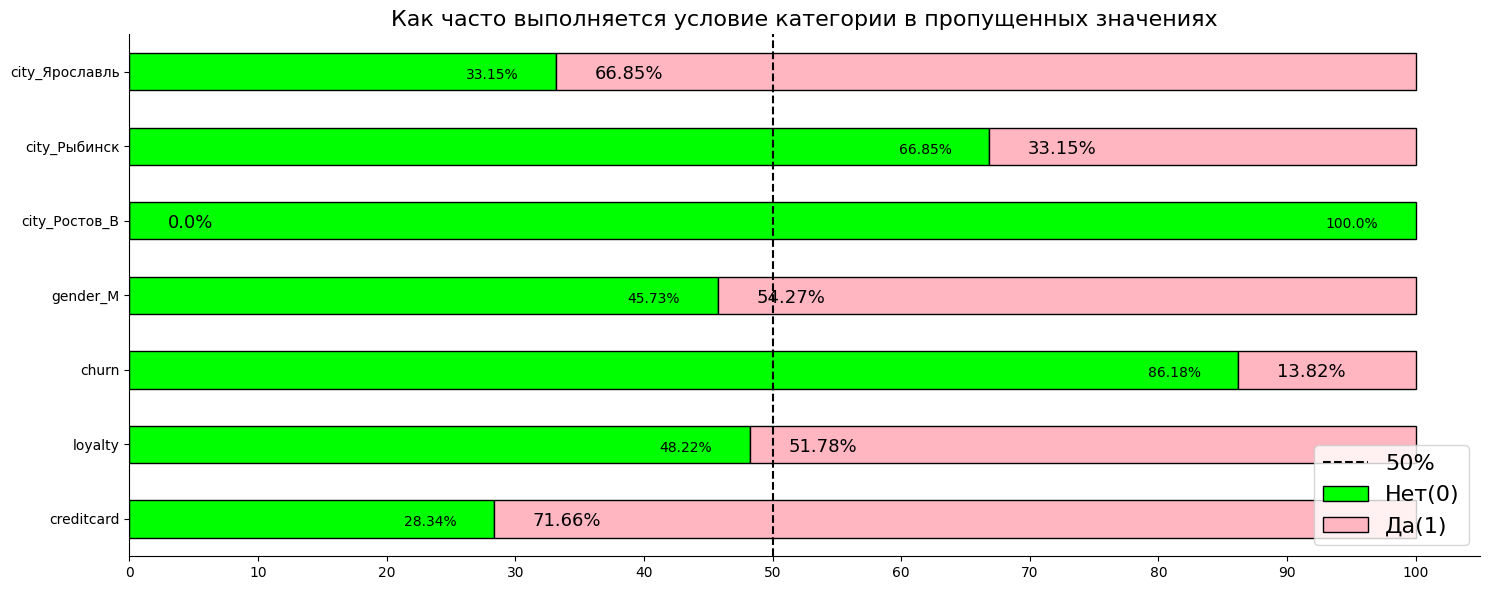

In [ ]:

ax=na_count[['0_pct_%','1_pct_%']].plot(kind='barh',edgecolor='black', stacked=True, color=['lime','lightpink'],  figsize=(15,6))
plt.axvline(x=50,linestyle='--',color='black')
plt.title('Как часто выполняется условие категории в пропущенных значениях',fontsize=16)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
lines, label = ax.get_legend_handles_labels()
ax.legend(lines, labels=['50%','Нет(0)','Да(1)'], loc = 'lower right', fontsize=16)
#ax.patches[0].get_width()

for p in ax.patches[:7]:
    percentage =p.get_width()
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-7
    y=p.get_y()+height-0.35
    ax.annotate(str(percentage)+'%',(x,y))
for p in ax.patches[7:]:
    percentage =p.get_width()
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+3
    y=p.get_y()+height-0.35
    ax.annotate(str(round(percentage,2))+'%',(x,y),fontsize=13)
plt.tight_layout()
sns.despine()

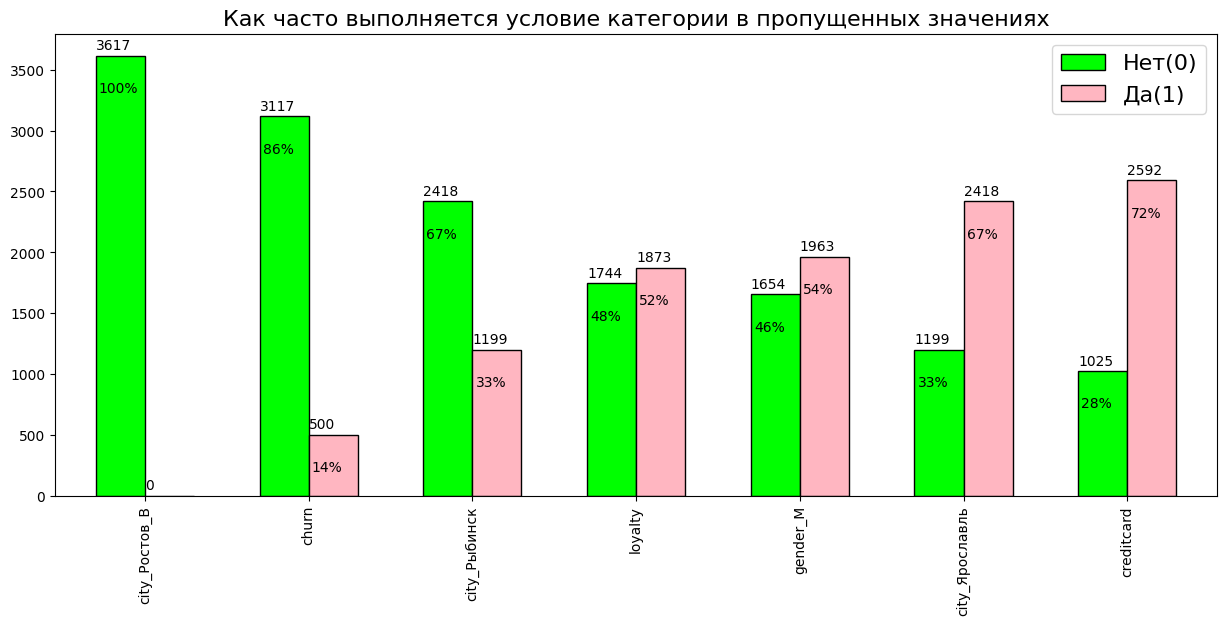

In [ ]:
ax=na_count.sort_values(by='1',axis=0)[['0','1']].plot(kind='bar', color=['lime','lightpink'],width=0.6,  figsize=(15,6),edgecolor='black')
#plt.axvline(x=50,linestyle='--',color='black')
plt.title('Как часто выполняется условие категории в пропущенных значениях',fontsize=16)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(250))
lines, label = ax.get_legend_handles_labels()
ax.legend(lines, labels=['Нет(0)','Да(1)'], loc = 'upper right', fontsize=16)
#ax.patches[0].get_width()
for p in ax.patches[:]:
    percentage =p.get_height()
    width, height =p.get_width(),p.get_height()
    x=p.get_x()
    y=p.get_y()+height+50
    ax.annotate(round(percentage),(x,y))
for p in ax.patches[:]:
    percentage =p.get_height()/na_data.shape[0]*100
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+0.019
    y=p.get_y()+height-300
    ax.annotate(str(round(percentage))+'%',(x,y))

**Вывод:**

- Все пропуски поля balance которые есть в датасете НЕ из Ростова Великого;
- 86% пропусков поля balance принадлежат оставшимся клиентам клиентам;
- 72% таких клиентов имеют кредитную карту;
- 67% таких клиентов из городов Рыбинск и Ярославль - около 50%;

В Ростове Великом очень хорошо обращаются с данными 100% пропусков из поля balance у клиентов НЕ из этого города.

Стоит обратить внимание на то что клиенты с пропуском в балансе чаще остаются.


Так же можно отметить что в колонке balance, которая показывает баланс на счете, нет пользователей у которых количество денег на счете равно нулю, воплне вероятно что 0 тут заменен на пропуск

___________________________________________________________________

**ВЫВОД:**

**Привели названия колонок к нижнему регистру. Выяснили что в датасете нет дубликатов. Пропуски есть только в колонке balance, которая отражает баланс на счете пользователя. Пропусков там 3617. Решено оставить пропуски и при необходимости их заменить на удобное для задачи значение.**

**Применил one-hot кодировку, с помощью метода pd.get_dummies(). Новые столбцы gender_М – означающее 1 если пол мужской и 0 если женский (не в обиду прекрасному полу, но второй противоположный столбец был бы лишним). Далее идут столбцы с городом где 1 значит что юзер проживает в данном городе и 0, что нет: city_Ростов_В,  city_Рыбинск и city_Ярославль.**


___

##  Исследовательский анализ данных:

In [ ]:
def boxplots(data_x,columns):
    sns.set_style('darkgrid')
    fig, axs = plt.subplots(figsize=(13,6))
    if data_x['products'].mean()==1:
        l=1
    elif data_x['products'].mean()==2:
        l=2
    elif data_x['products'].mean()==3:
        l=3
    elif data_x['products'].mean()==4:
        l=4
    else:
        l=''
    fig.suptitle(t=f"Boxplot'ы распределения data {l}:", fontsize=20)
    col=['red','blue','green','purple','orange','yellow','brown','pink']
    num_data_boxplot=data_x[columns]
    for b in num_data_boxplot.columns:
        for n in range(0,len(num_data_boxplot.columns)):
            if num_data_boxplot.columns[n]==b:
                axn=n
        ax=sns.boxplot(y=num_data_boxplot[b], ax=plt.subplot(1,5,axn+1),color=col[axn], linewidth=4,
                       medianprops=dict(color="white", alpha=1),
                flierprops=dict(markerfacecolor="black"))
        ax.set(title=b)
    plt.tight_layout()
    sns.despine()

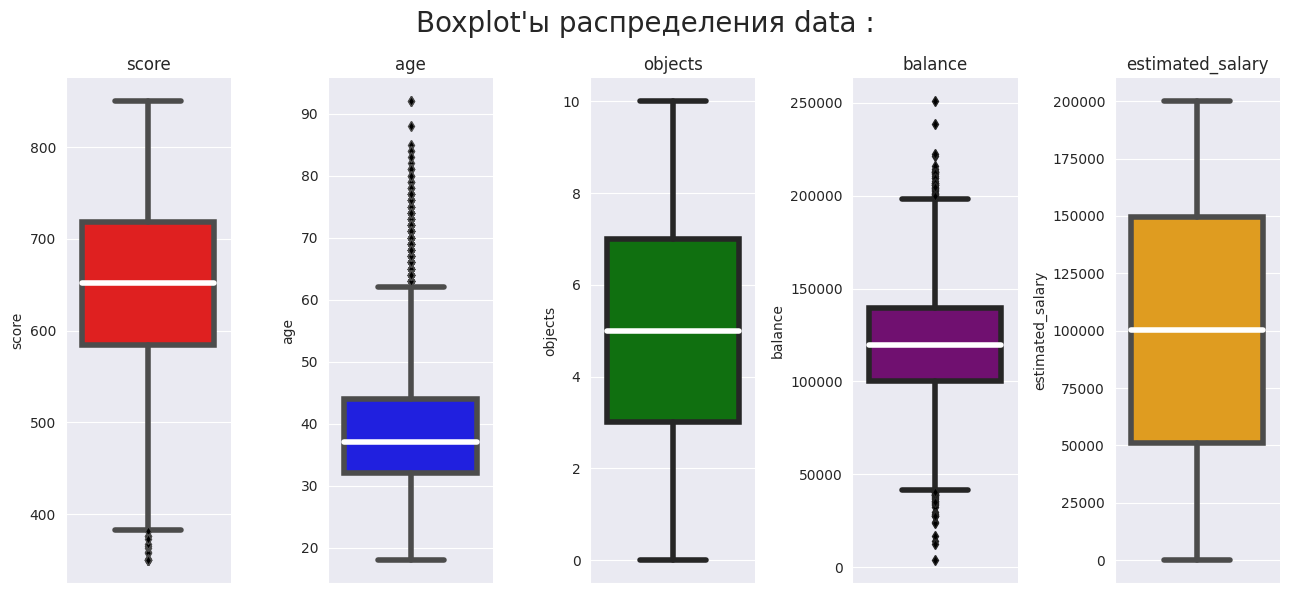

In [ ]:
boxplots(data,columns=col_name)

**Вывод:** Много выбросов в колонке age

<Figure size 640x480 with 0 Axes>

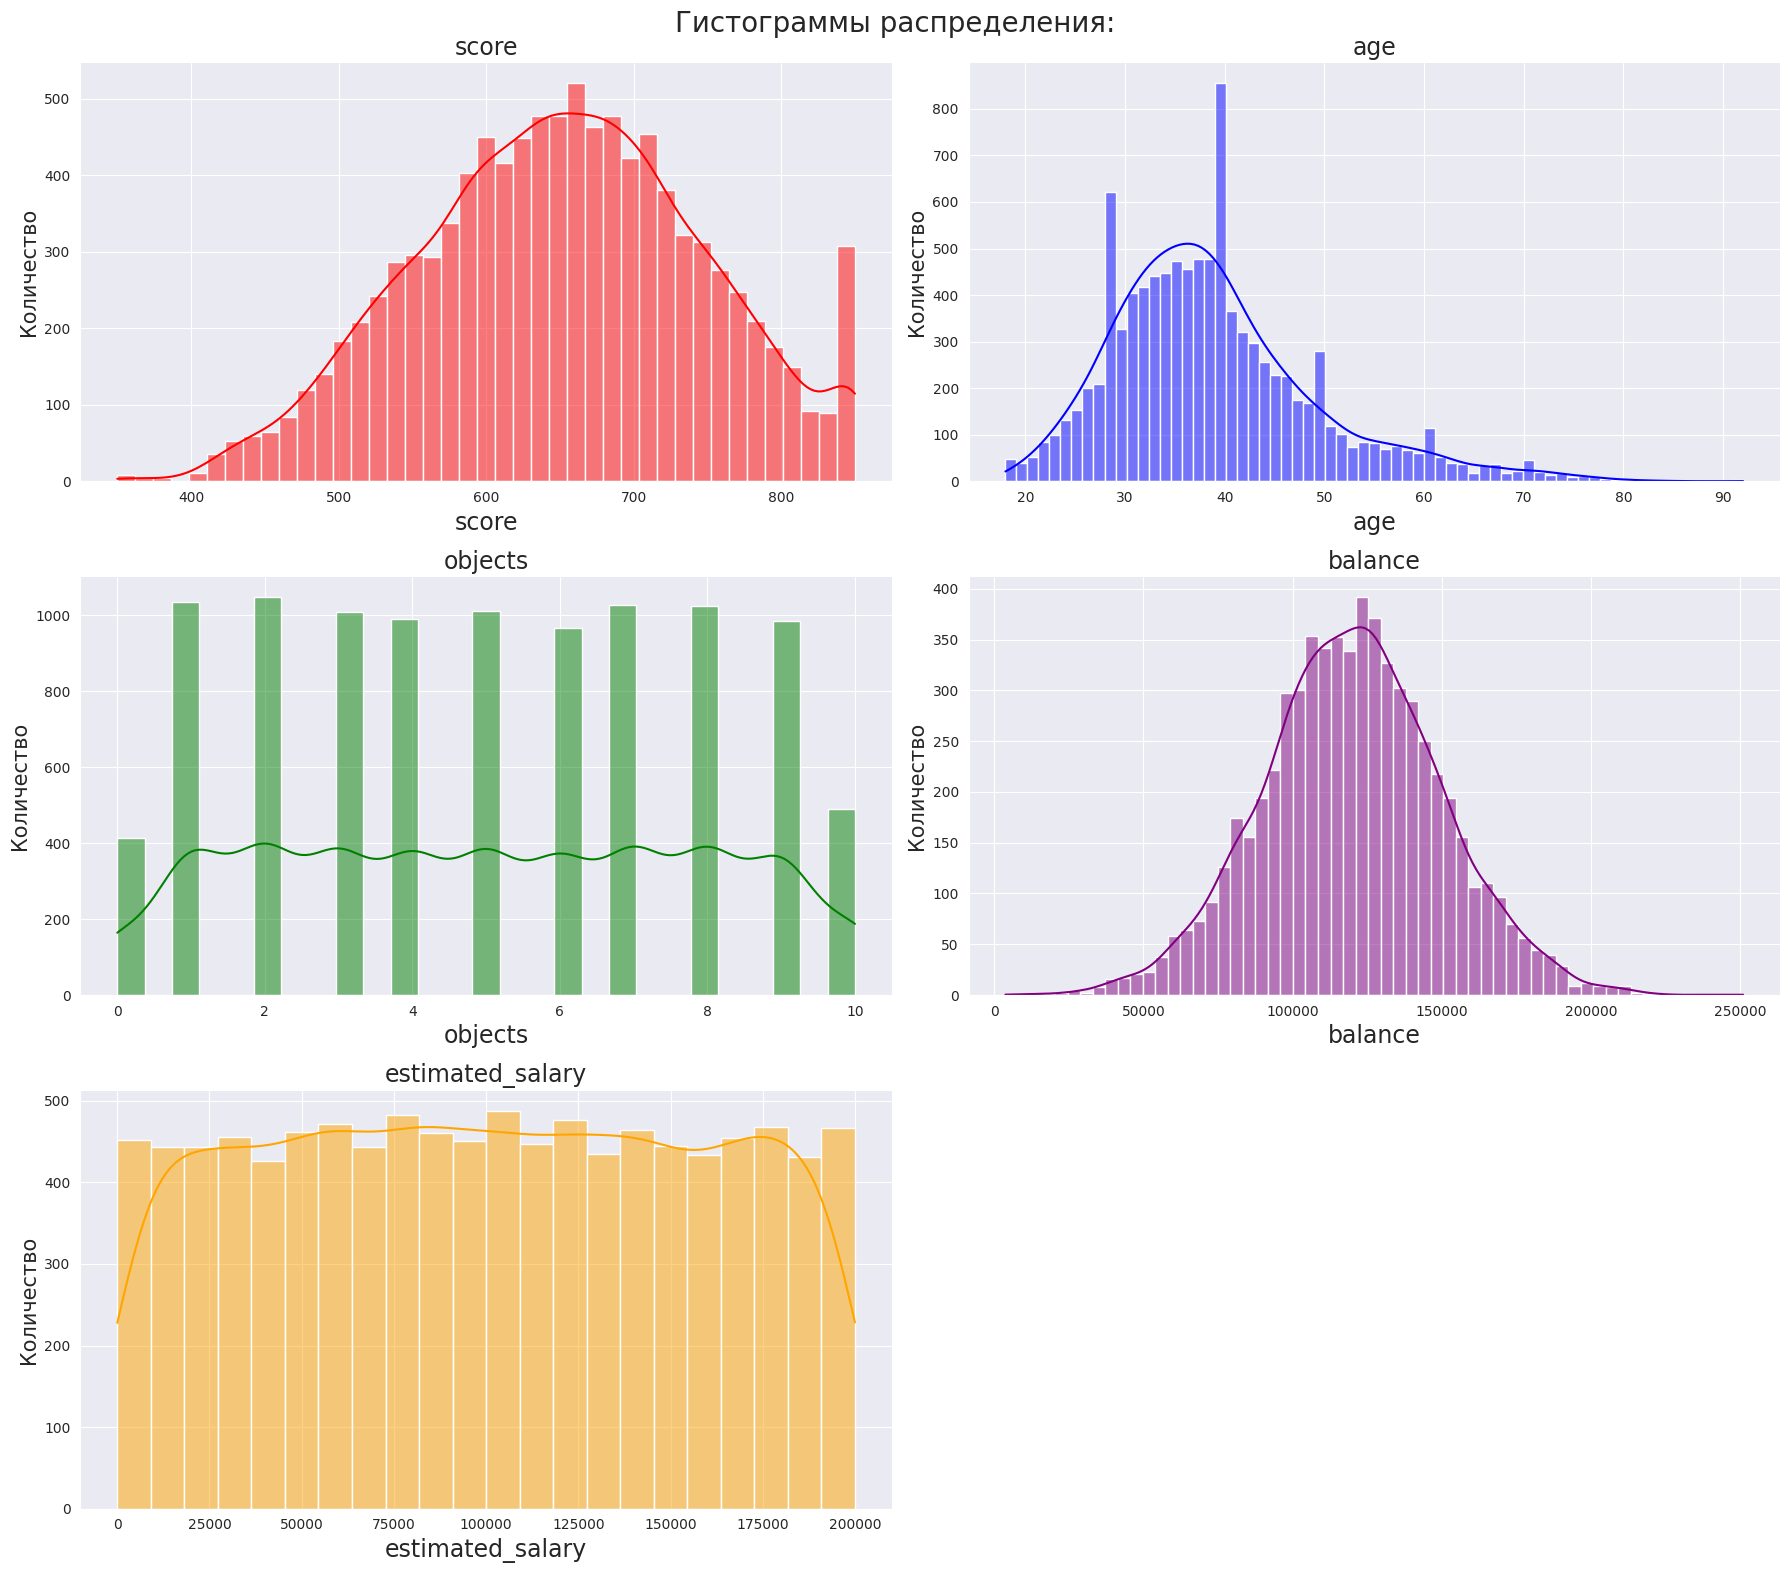

In [ ]:
sns.set_style('darkgrid')
plt.suptitle("suptitle")
fig, axs = plt.subplots(figsize=(18,16))
fig.suptitle('Гистограммы распределения:', fontsize=20)
col=['red','blue','green','purple','orange','yellow','brown','pink']
for b in num_data_boxplot.columns:
    for n in range(0,len(num_data_boxplot.columns)):
        if num_data_boxplot.columns[n]==b:
            axn=n
    ax=sns.histplot(x=num_data_boxplot[b], ax=plt.subplot(3,2,axn+1),color=col[axn], linewidth=1,kde=True)
    ax.set_title(b,fontsize=17)
    ax.set_xlabel(b,fontsize=17)
    ax.set_ylabel('Количество',fontsize=15)
plt.tight_layout()
sns.despine()

**Построим корреляционною матрицу:**

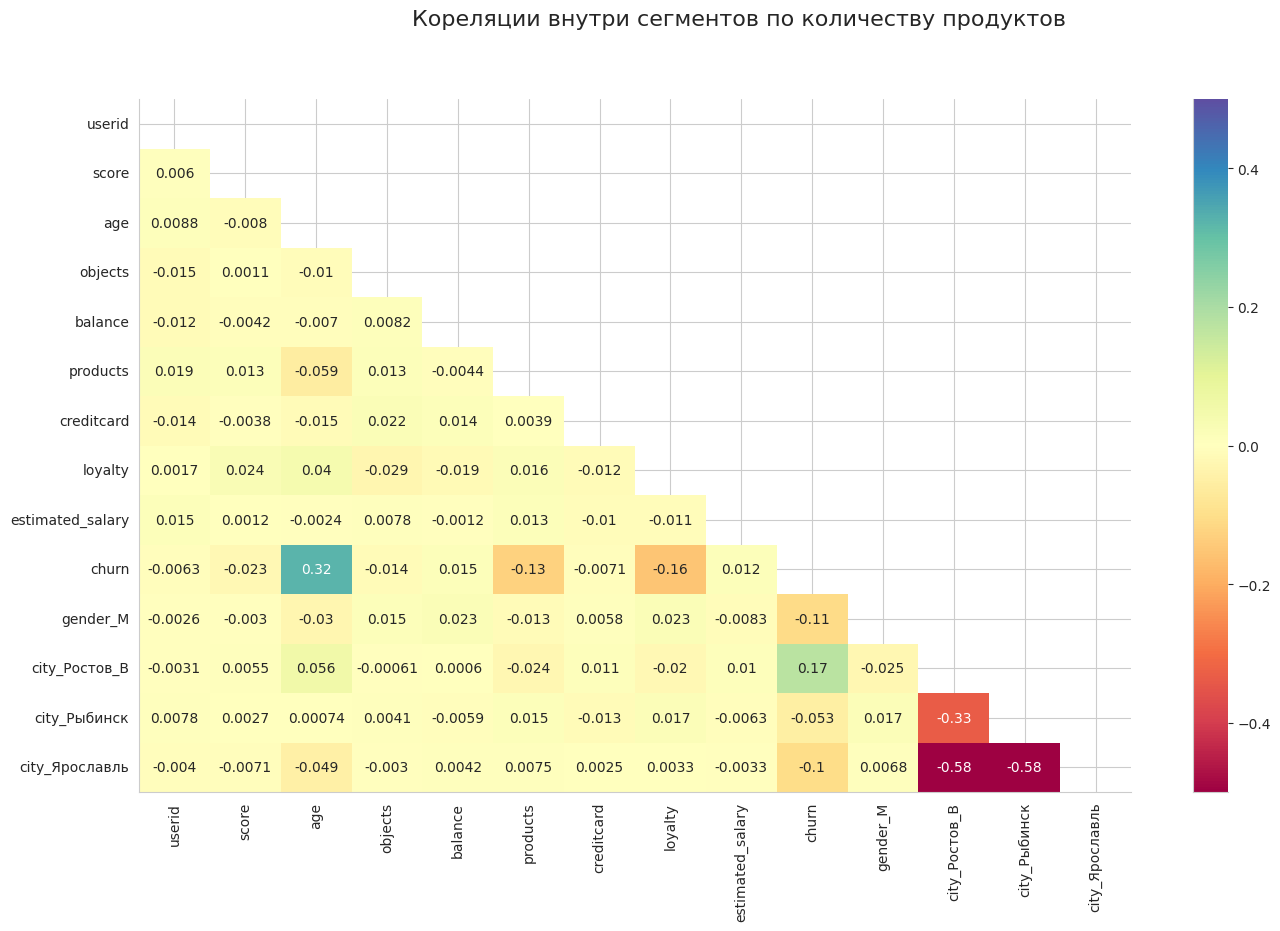

In [ ]:
mask=np.zeros_like(data.corr(method='spearman'))
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
fig =plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method='spearman'),annot=True,cmap='Spectral', mask=mask,vmin=-0.5, vmax=0.5,cbar=True)
fig.suptitle('Кореляции внутри сегментов по количеству продуктов', fontsize=16)
#ax.set_title(x, fontsize=16)
sns.despine()

Так же существует корреляция Спирмена, и очень продвинутый коэффициент корреляции Phik. С его помощью можно получать адекватные значения корреляции для данных любой природы. https://phik.readthedocs.io/en/latest/introduction.html


**Вывод:**
не стоит учитывать большие значения между полеми полученными с помошью one-hot кодировки - очевидно, что если человек не живет в одном городе то скорее всего он живет во втором или третьем если их всего три.

**Вывод:** показатель 0.32 в корреляции между статусом оттока и возрастом невысок, но выше всех остальных намного. Стоит обратить на это внимание.

**ВЫВОД:**

**При анализа распределения показателей на графике boxplots в показателе age (возраст) заметил много выбросов после 62 лет.**


**При рассмотрении корреляции между показателями не стоит учитывать большие значения между полями полученными с помощью one-hot кодировки - очевидно, что если человек не живет в одном городе то скорее всего он живет во втором или третьем если их всего три.
Показатель 0.32 в корреляции между статусом оттока и возрастом невысок, но выше всех остальных намного. Стоит обратить на это внимание.**


## Сегментируем пользователей по количеству продуктов:

**В данном пункте постараемся найти причину оттока клиентов и определить портрет таких клиентов.**

In [ ]:
products_userid_count=data.pivot_table(index='products',values='userid',aggfunc='count')
products_userid_count['pct_%']=round(products_userid_count['userid']/products_userid_count['userid'].sum()*100,2)
table_name('Количетво клиентов в каждом сегменте')
products_userid_count

____________________________________
Количетво клиентов в каждом сегменте:
- - - - - - - - - - - - - - - - - - 


userid  pct_%
products               
1           5084  50.84
2           4590  45.90
3            266   2.66
4             60   0.60

In [ ]:
fig = go.Figure(data=[go.Pie(labels=products_userid_count.index,  values=products_userid_count['userid'] )])
fig.update_traces( textinfo='value+percent', textfont_size=15)
fig.update_layout(title='Количетво клиентов в каждом сегменте', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=400,
                  annotations=[dict(x=1.105, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Сегмент:',
                                    showarrow=False)])

**Вывод:**

In [ ]:
print('Доля первых двух сегментов в структуре всех клиентов равна',
      round(products_userid_count.loc[1:2,'pct_%'].sum(),2),'%. Это -', products_userid_count.loc[1:2,'userid'].sum(),
      'пользователей.')

Доля первых двух сегментов в структуре всех клиентов равна 96.74 %. Это - 9674 пользователей.


In [ ]:
products_churn_userid_count=data.pivot_table(index='products',columns='churn',values='userid',aggfunc='count')
products_churn_userid_count=products_churn_userid_count.fillna(0)
products_churn_userid_count['sum_x']=(products_churn_userid_count[0]+products_churn_userid_count[1]).astype('int')
products_churn_userid_count['0_pct_%']=round(products_churn_userid_count[0]/products_churn_userid_count['sum_x']*100,2)
products_churn_userid_count['1_pct_%']=round(products_churn_userid_count[1]/products_churn_userid_count['sum_x']*100,2)
table_name('Посегментное количество клиентов и их процентное соотношение в зависимости от статуса оттока')
products_churn_userid_count

____________________________________________________________________________________________
Посегментное количество клиентов и их процентное соотношение в зависимости от статуса оттока:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


churn          0       1  sum_x  0_pct_%  1_pct_%
products                                         
1         3675.0  1409.0   5084    72.29    27.71
2         4242.0   348.0   4590    92.42     7.58
3           46.0   220.0    266    17.29    82.71
4            0.0    60.0     60     0.00   100.00

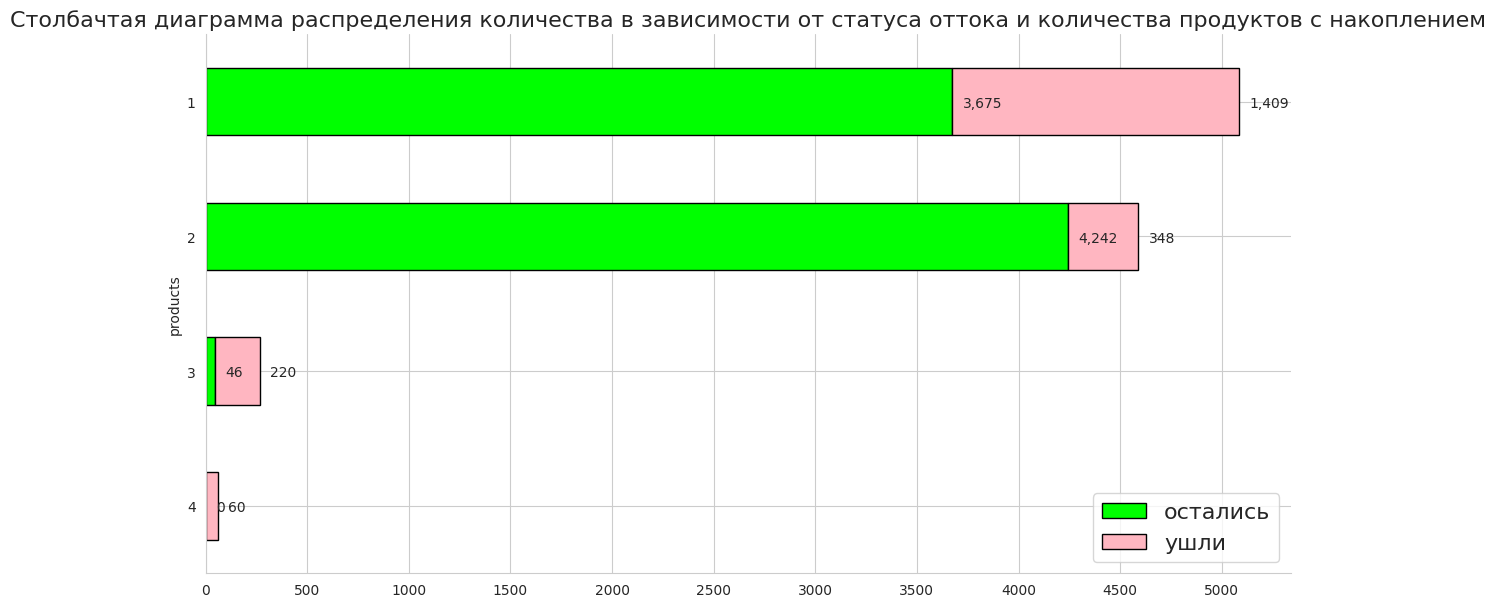

In [ ]:
ax=products_churn_userid_count[[0,1]].sort_values(by='products',ascending=False).plot(kind='barh',edgecolor='black'
                                                                                   ,stacked=True,color=['lime','lightpink'],
                                                                                   figsize=(14,7))
for p in ax.patches:
    percentage ='{:,.0f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+50
    y=p.get_y()+height-0.29
    ax.annotate(percentage,(x,y))
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
lines, label = ax.get_legend_handles_labels()
ax.legend(lines, labels=['остались','ушли'], loc = 'lower right', fontsize=16)
plt.title('Столбачтая диаграмма распределения количества в зависимости от статуса оттока и количества продуктов с накоплением',
         fontsize=16)
sns.despine()

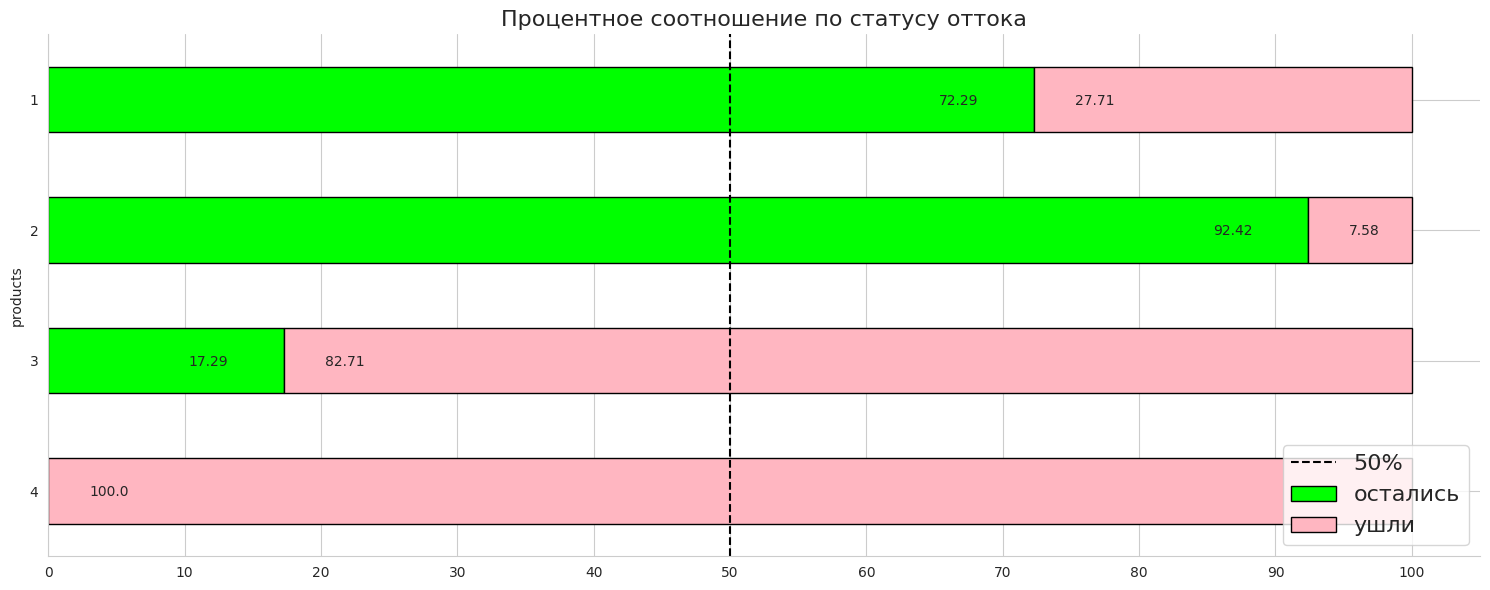

In [ ]:

ax=products_churn_userid_count[['0_pct_%','1_pct_%']].sort_values(by='products',ascending=False).plot(kind='barh',edgecolor='black',
                                                                                                   stacked=True,
                                                                                                   color=['lime','lightpink'],
                                                                                                   figsize=(15,6))
plt.axvline(x=50,linestyle='--',color='black')
plt.title('Процентное соотношение по статусу оттока',fontsize=16)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
lines, label = ax.get_legend_handles_labels()
ax.legend(lines, labels=['50%','остались','ушли'], loc = 'lower right', fontsize=16)
#ax.patches[0].get_width()

for p in ax.patches[:4]:
    percentage =p.get_width()
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-7
    y=p.get_y()+height-0.29
    ax.annotate(percentage,(x,y))
for p in ax.patches[4:]:
    percentage =p.get_width()
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+3
    y=p.get_y()+height-0.29
    ax.annotate(percentage,(x,y))
plt.tight_layout()
sns.despine()

In [ ]:
products_churn_userid_count[['0_pct_%','1_pct_%']]

churn     0_pct_%  1_pct_%
products                  
1           72.29    27.71
2           92.42     7.58
3           17.29    82.71
4            0.00   100.00

**Вывод**: видно что группы сильно отличаются по оттоку в зависимости от количества используемых продуктов

все клиенты у которых 4 продукта отказались от услуг банка. Более 80% клиентов с 3 продуктами отказались от услуг. Это наталкивает на мысль что какой-то не самый популярный и возможно дорогой продукт побуждает клиентов отказаться от сотрудничества.

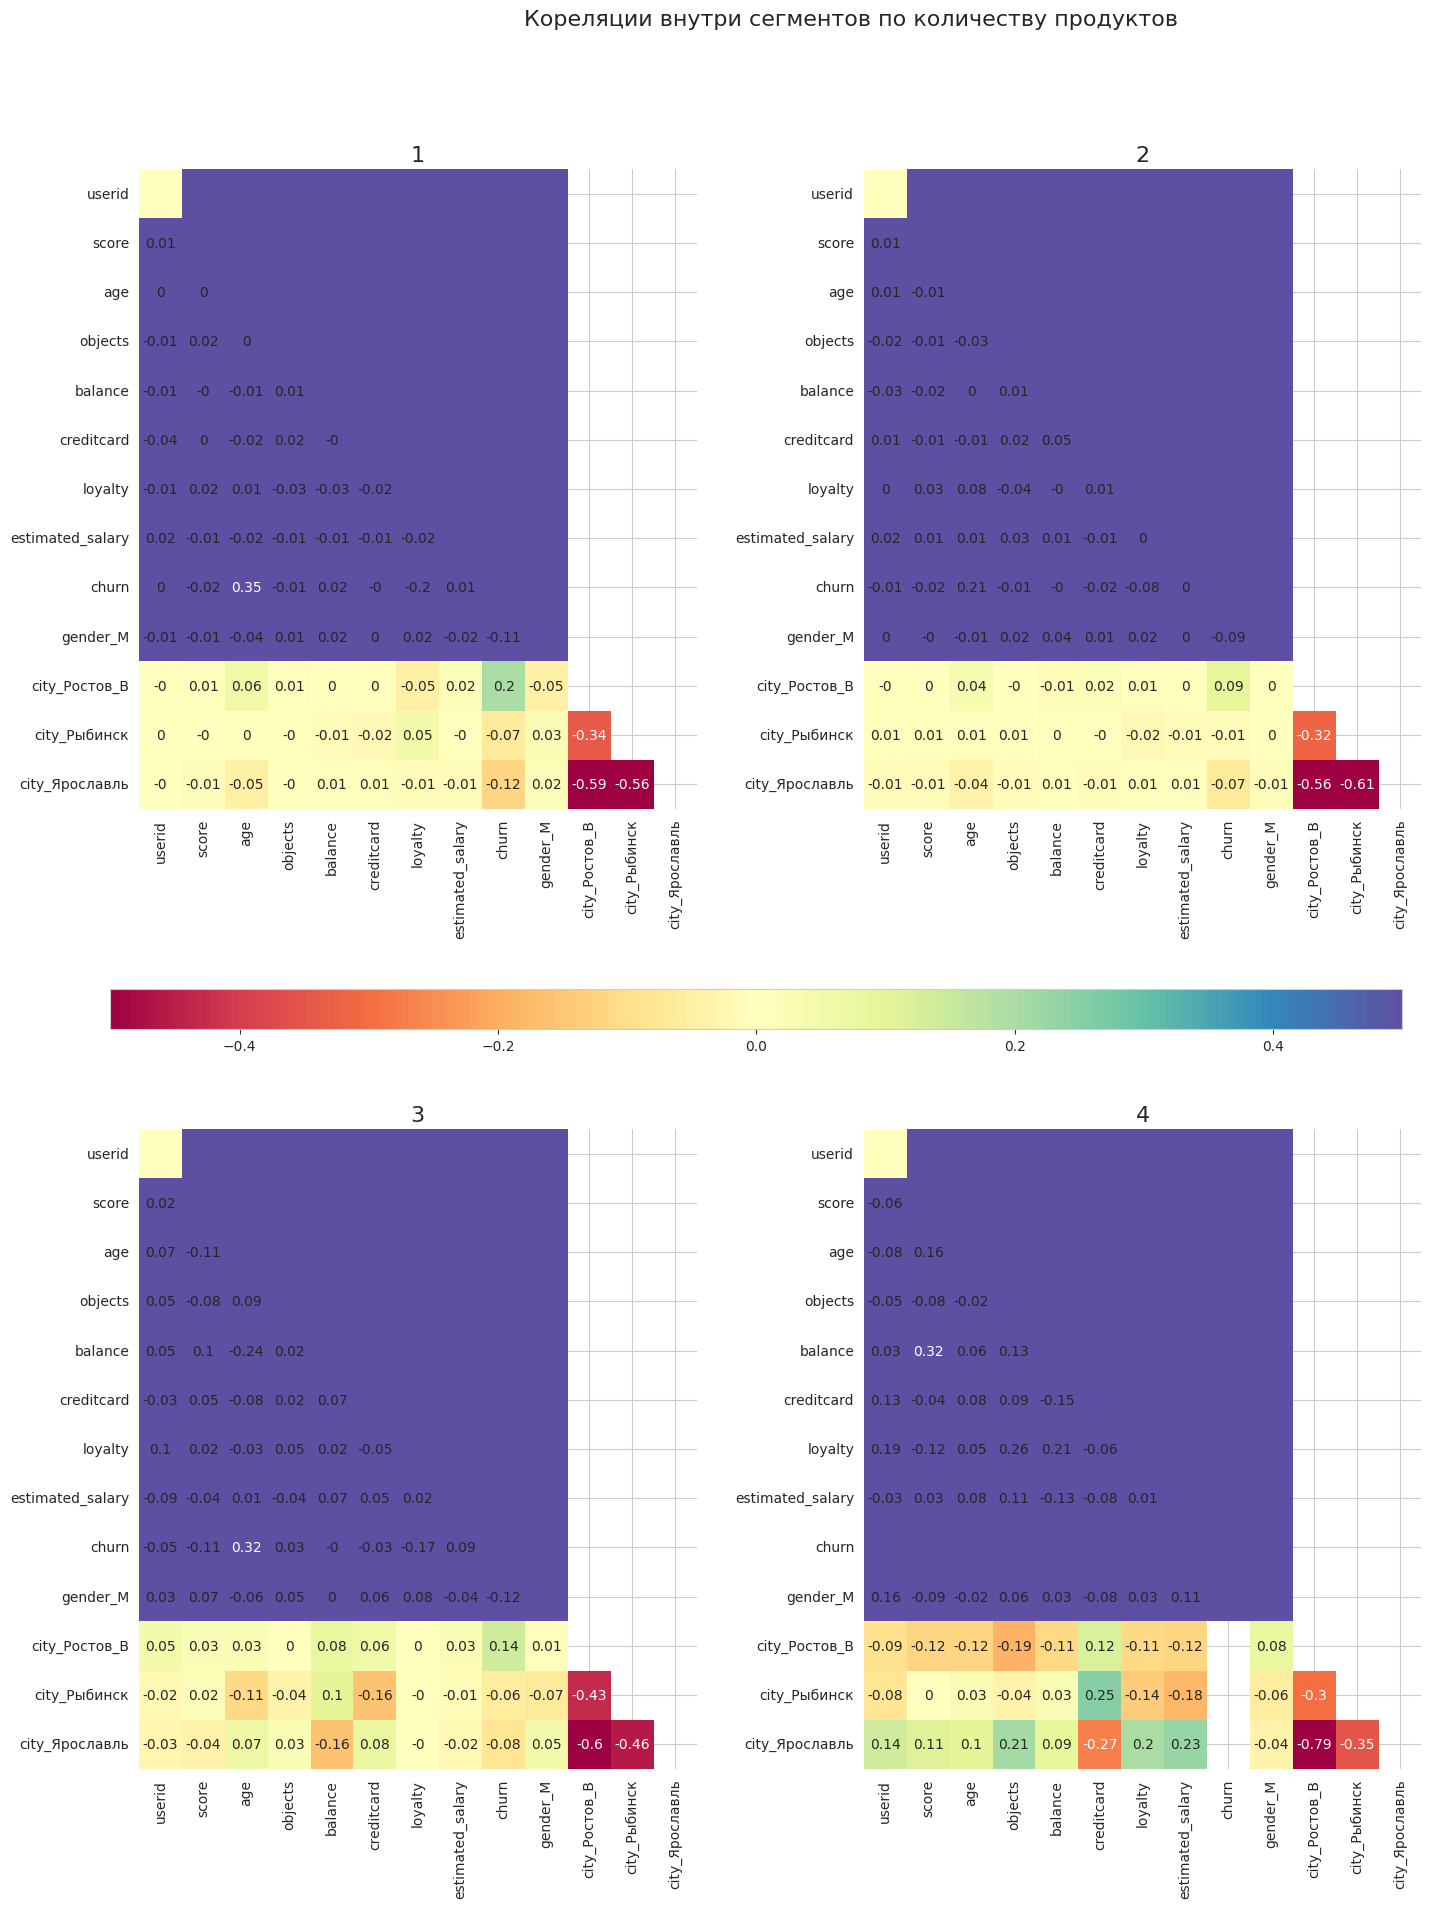

In [ ]:
arr = np.arange(100).reshape((10, 10))
norm = mcolors.Normalize(vmin=-0.5, vmax=0.5)
pc_kwargs = {'rasterized': True, 'cmap': 'Spectral', 'norm': norm}
im = ax.pcolormesh(arr, **pc_kwargs)

sns.set_style('whitegrid')
fig, axs = plt.subplots(2, 2,figsize=(19,20))
plt.subplots_adjust(hspace=0.5)
for x in data['products'].unique():
    mask=np.zeros_like(data[data['products']==x].drop(columns='products').corr(method='spearman'))
    mask[np.triu_indices_from(mask)] = True
    ax=sns.heatmap(round(data[data['products']==x].drop(columns='products').corr(method='spearman'),2),
                   annot=True,cmap='Spectral', mask=mask,ax=plt.subplot(2,2,x),vmin=-0.5, vmax=0.5,cbar=False)
    ax.set_title(x, fontsize=16)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,wspace=0.3)
cax = plt.axes([0.11, 0.47, 0.68, 0.02])
#plt.colorbar()
for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)
plt.colorbar(im, shrink=0.6,cax=cax,orientation= 'horizontal')
fig.suptitle('Кореляции внутри сегментов по количеству продуктов', fontsize=16)
plt.show()

**Сделаем функции для графиков и таблиц:**

In [ ]:
#Функция для построения boxplot'а:
def boxplots_segments( _data_ , _x_ , _y_ , _hue_ ,_title_, _xtick_locator_  ,_ytick_locator_=0.5):
    plt.figure(figsize=(16,6))
    ax=sns.boxplot(data=_data_,x= _x_ ,y= _y_ ,linewidth=4,orient='h',hue=_hue_,
                           medianprops=dict(color="white", alpha=1),
                    flierprops=dict(markerfacecolor="black"))
    ax.set_title( _title_ ,fontsize=20)
    ax.set_ylabel(_y_,fontsize=18)
    ax.set_xlabel(_x_,fontsize=18)
    plt.tick_params(axis='both', which='both', labelsize=20)
    if _xtick_locator_ != None:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(_xtick_locator_))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    if _hue_ !=None:
        ax.legend(fontsize=18)
    plt.grid(True)
    plt.tight_layout()

In [ ]:
#Функция для построения violinlot'а:
def violinlots_segments( _data_ , _x_ , _y_ , _hue_ ,_title_, _xtick_locator_  ,_ytick_locator_=0.5):
    plt.figure(figsize=(13,8))
    if _hue_==None:
        ax=sns.violinplot(data=_data_,x= _x_ ,y= _y_ ,linewidth=4,orient='h',medianprops=dict(color="white", alpha=1),
                    flierprops=dict(markerfacecolor="black"))
    else:
        ax=sns.violinplot(data=_data_,x= _x_ ,y= _y_ ,linewidth=4,orient='h',hue=_hue_,
                      split=True,inner="quart",hue_order= [1, 0],
                      palette={1: "deepskyblue", 0: ".85"},medianprops=dict(color="white", alpha=1),
                    flierprops=dict(markerfacecolor="black"))
    ax.set_title( _title_ ,fontsize=20)
    ax.set_ylabel(_y_,fontsize=18)
    ax.set_xlabel(_x_,fontsize=18)
    plt.tick_params(axis='both', which='both', labelsize=20)
    if _xtick_locator_ != None:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(_xtick_locator_))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    if _hue_ !=None:
        blue_patch = mpatches.Patch(facecolor='deepskyblue', label='ушли',edgecolor='black')
        grey_patch = mpatches.Patch(facecolor='.85', label='остались',edgecolor='black')
        ax.legend(title = 'статус оттока:',handles=[blue_patch,grey_patch],fontsize=16, loc = 'right',title_fontsize=18)
    plt.grid(True)
    plt.tight_layout()

In [ ]:
#Функция для таблицы с общими статистиками и показателями распределения значений и выбросов:
def descr_categorial(churn_status,pctle,indicator,low_outlier_need,up_outlier_need,tab_name):
    new_data=data[data['churn']==churn_status]
    describe_score_categorial=pd.DataFrame({1:new_data[new_data['products']==1][indicator].describe(percentiles=pctle)})
    for b in new_data['products'].sort_values().unique():
        describe_score_categorial[b]=new_data[new_data['products']==b][indicator].describe(percentiles=pctle)
    describe_score_categorial['all']=new_data[indicator].describe(percentiles=pctle)

    if low_outlier_need==True:
        describe_score_categorial.loc['low_out_border',
                                      :]=describe_score_categorial.loc['25%',
                                                                       :]-(describe_score_categorial.loc['75%',:]
                                                                                       -describe_score_categorial.loc['25%',
                                                                                                                      :])*1.5

        for x in describe_score_categorial.columns:
            describe_score_categorial.loc['lower_out',x]=new_data[np.logical_and(new_data['products']==x,
                            new_data[indicator]<describe_score_categorial.loc['low_out_border',x])].shape[0]
            describe_score_categorial.loc['lower_5%',x]=new_data[np.logical_and(new_data['products']==x,
                            new_data[indicator]<describe_score_categorial.loc['5%',x])].shape[0]

            describe_score_categorial.loc['lower_1%',x]=new_data[np.logical_and(new_data['products']==x,
                            new_data[indicator]<describe_score_categorial.loc['1%',x])].shape[0]

        describe_score_categorial.loc['lower_out','all']=new_data[new_data[indicator]<describe_score_categorial.loc['low_out_border','all']].shape[0]
        describe_score_categorial.loc['lower_5%','all']=new_data[new_data[indicator]<describe_score_categorial.loc['5%','all']].shape[0]
        describe_score_categorial.loc['lower_1%','all']=new_data[new_data[indicator]<describe_score_categorial.loc['1%','all']].shape[0]
        describe_score_categorial.loc['pct_lower_out',:]=round(describe_score_categorial.loc['lower_out',:]/
                                                        describe_score_categorial.loc['count',:]*100,2)


    if up_outlier_need==True:
        describe_score_categorial.loc['up_out_border',
                                      :]=describe_score_categorial.loc['75%',:]+(describe_score_categorial.loc['75%',:]
                                                                                       -describe_score_categorial.loc['25%',
                                                                                                                      :])*1.5


        for x in describe_score_categorial.columns:
            describe_score_categorial.loc['upper_out',x]=new_data[np.logical_and(new_data['products']==x,
                            new_data[indicator]>describe_score_categorial.loc['up_out_border',x])].shape[0]
            describe_score_categorial.loc['upper_95%',x]=new_data[np.logical_and(new_data['products']==x,
                            new_data[indicator]>describe_score_categorial.loc['95%',x])].shape[0]

            describe_score_categorial.loc['upper_99%',x]=new_data[np.logical_and(new_data['products']==x,
                            new_data[indicator]>describe_score_categorial.loc['99%',x])].shape[0]

        describe_score_categorial.loc['upper_out','all']=new_data[new_data[indicator]
                                                                      >describe_score_categorial.loc['up_out_border',
                                                                                                     'all']].shape[0]

        describe_score_categorial.loc['upper_99%','all']=new_data[new_data[indicator]>describe_score_categorial.loc['99%','all']].shape[0]
        describe_score_categorial.loc['upper_95%','all']=new_data[new_data[indicator]>describe_score_categorial.loc['95%','all']].shape[0]
        describe_score_categorial.loc['pct_upper_out',:]=round(describe_score_categorial.loc['upper_out',:]/
                                                        describe_score_categorial.loc['count',:]*100,2)


    describe_score_categorial=describe_score_categorial.T
    describe_score_categorial['count']=describe_score_categorial['count'].astype('int64')
    for x in describe_score_categorial.columns:
        if x!='pct_upper_out':
            if x!='pct_lower_out':
                describe_score_categorial[x]=describe_score_categorial[x].astype('int')
    if churn_status==1:
        table_name(tab_name+' '+str('для ушедних клиентов'))
    elif churn_status==0:
        table_name(tab_name+' '+str('для НЕ ушедших клиентов'))
    pd.set_option('display.max_columns', None)
    display(describe_score_categorial)



In [ ]:
data.query('products<=2')['products'].unique()

array([1, 2])

In [ ]:
def hist_compare(data_x, _x_ ,  _hue_, title_name,color1,color2):
    uni=data_x[_hue_].unique()
    fig= plt.subplots(figsize=(13,6))
    ax=sns.histplot(data=data_x,x=_x_,hue=_hue_,common_norm=False,stat="density",kde=True,linewidth=3,
                   palette={uni[0]: color1, uni[1]: color2})
    first_patch = mpatches.Patch(facecolor=color1, label=uni[0],edgecolor='black')
    second_patch = mpatches.Patch(facecolor=color2, label=uni[1],edgecolor='black')
    ax.legend(title =_hue_+str(':'),handles=[first_patch,second_patch],fontsize=16,title_fontsize=18)
    ax.set_title(title_name,fontsize=18)
    sns.despine()

**Выведем и сохраним в переменные таблицы кажодго сегмента:**

In [ ]:
data_1=data.query('products==1')
data_1.head(1)

userid  score gender  age  objects  balance  products  creditcard  \
0  15677338    619      Ж   42        2      NaN         1           1   

   loyalty  estimated_salary  churn  gender_М  city_Ростов_В  city_Рыбинск  \
0        1         101348.88      1         0              0             0   

   city_Ярославль  
0               1

In [ ]:
data_2=data.query('products==2')
data_2.head(1)

userid  score gender  age  objects  balance  products  creditcard  \
3  15744090    699      Ж   39        1      NaN         2           0   

   loyalty  estimated_salary  churn  gender_М  city_Ростов_В  city_Рыбинск  \
3        0          93826.63      0         0              0             0   

   city_Ярославль  
3               1

In [ ]:
data_3=data.query('products==3')
data_3.head(1)

userid  score gender  age  objects   balance  products  creditcard  \
2  15662040    502      Ж   42        8  159660.8         3           1   

   loyalty  estimated_salary  churn  gender_М  city_Ростов_В  city_Рыбинск  \
2        0         113931.57      1         0              0             0   

   city_Ярославль  
2               1

In [ ]:
data_4=data.query('products==4')
data_4.head(1)

userid  score gender  age  objects    balance  products  creditcard  \
7  15698884    376      Ж   29        4  115046.74         4           1   

   loyalty  estimated_salary  churn  gender_М  city_Ростов_В  city_Рыбинск  \
7        0         119346.88      1         0              1             0   

   city_Ярославль  
7               0

### Рассмотрим пользователей по распределению банковского скоринга:

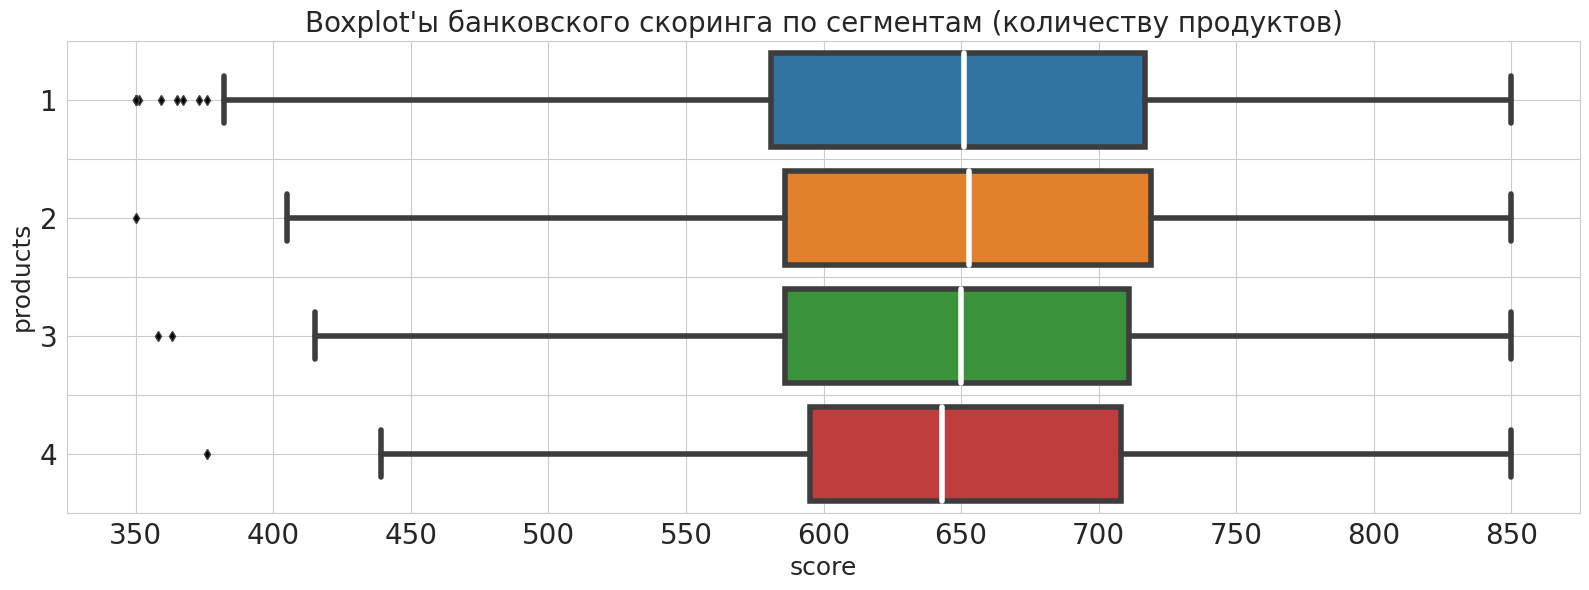

In [ ]:
boxplots_segments(_data_  = data,
_x_ ='score',
_y_ ='products',
_hue_ =None,
_title_  ="Boxplot'ы банковского скоринга по сегментам (количеству продуктов)",
_xtick_locator_ =50)

**Вывод:** На данном графике нет ничего что бросалось бы в глаза. Больше количество выбросов в первом сегменте объясняется его размером по сравнению с остальными сегментами.

In [ ]:
for x in data['churn'].unique():
    descr_categorial(churn_status=x,pctle=[.01,0.05,0.25, .5, .75],indicator='score',low_outlier_need=True,up_outlier_need=False,
                tab_name='Таблица с общими статистиками и показателями распределения значений и выбросов по скорину')

______________________________________________________________________________________________________________
Таблица с общими статистиками и показателями распределения значений и выбросов по скорину для ушедних клиентов:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


count  mean  std  min   1%   5%  25%  50%  75%  max  low_out_border  \
1     1409   645  101  350  399  479  576  647  718  850             363   
2      348   643   96  350  431  475  583  645  716  850             383   
3      220   643   98  358  416  483  575  647  710  850             372   
4       60   653  101  376  413  494  595  643  708  850             425   
all   2037   645  100  350  404  479  578  646  716  850             371   

     lower_out  lower_5%  lower_1%  pct_lower_out  
1            6        71        15           0.43  
2            1        18         4           0.29  
3            2        11         3           0.91  
4            1         3         1           1.67  
all         11       101        21           0.54

_________________________________________________________________________________________________________________
Таблица с общими статистиками и показателями распределения значений и выбросов по скорину для НЕ ушедших клиентов:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


count  mean  std  min   1%   5%  25%  50%  75%  max  low_out_border  \
1     3675   650   95  410  438  489  583  653  716  850             384   
2     4242   652   95  405  437  494  586  653  719  850             386   
3       46   670   73  455  492  571  612  671  713  807             462   
all   7963   651   95  405  438  492  585  653  718  850             385   

     lower_out  lower_5%  lower_1%  pct_lower_out  
1            0       182        36           0.00  
2            0       212        43           0.00  
3            1         3         1           2.17  
all          0       396        79           0.00

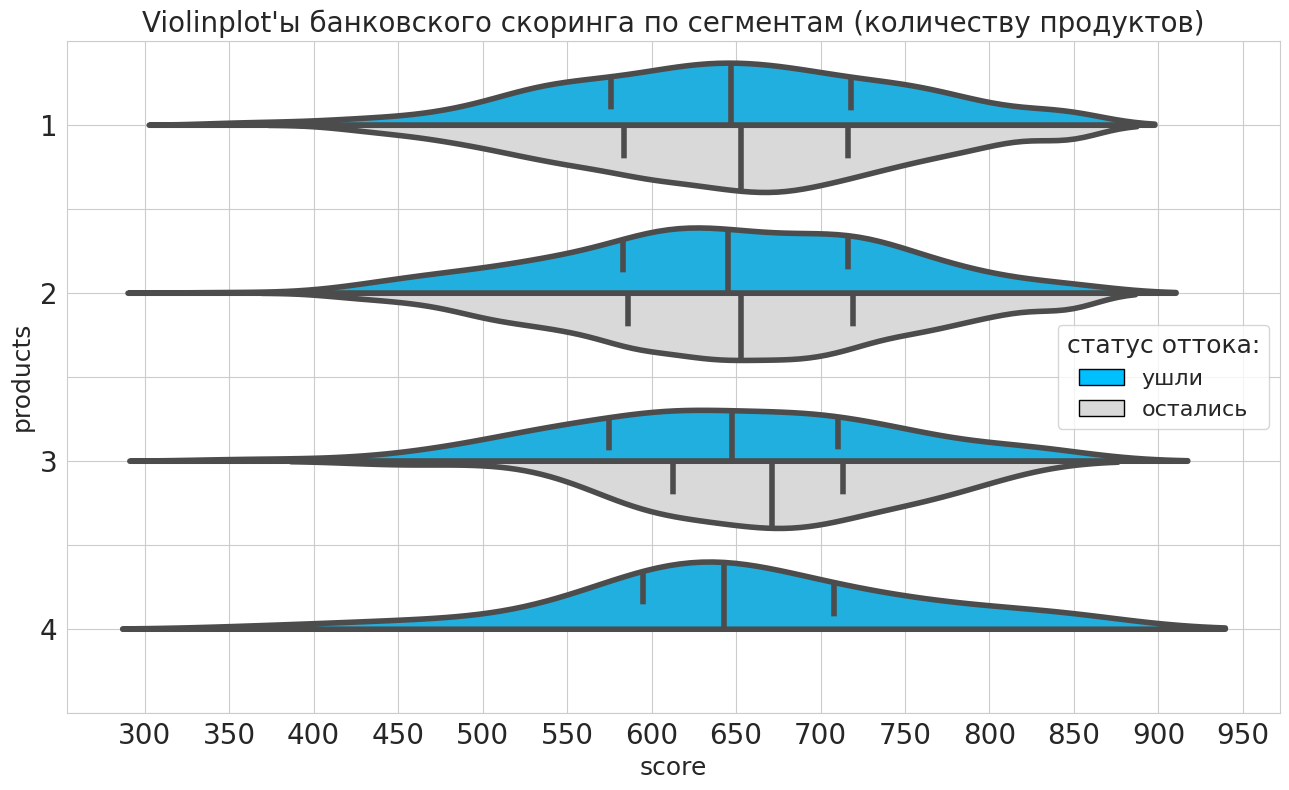

In [ ]:
violinlots_segments(_data_  = data,
_x_ ='score',
_y_ ='products',
_hue_ ='churn',
_title_  ="Violinplot'ы банковского скоринга по сегментам (количеству продуктов)",
_xtick_locator_ =50)

**Вывод:** во всех сегментах кроме 4 банковский скоринг в среднем больше у оставшихся, что скорее хороший показатель. В 3 сегменте видно большее разрыв в скоринге между ушедшими и оставшимися в сторону оставшихся - их скоринг в среднем больше. Данные отличаются не сильно но можно сделать заметку что от нас больше уходят клиенты с малым скорингом. Можно рискнуть и ввести более лояльную политику для клиентов с малым скорингом.

___

### Рассмотрим пользователей по распределению возраста:

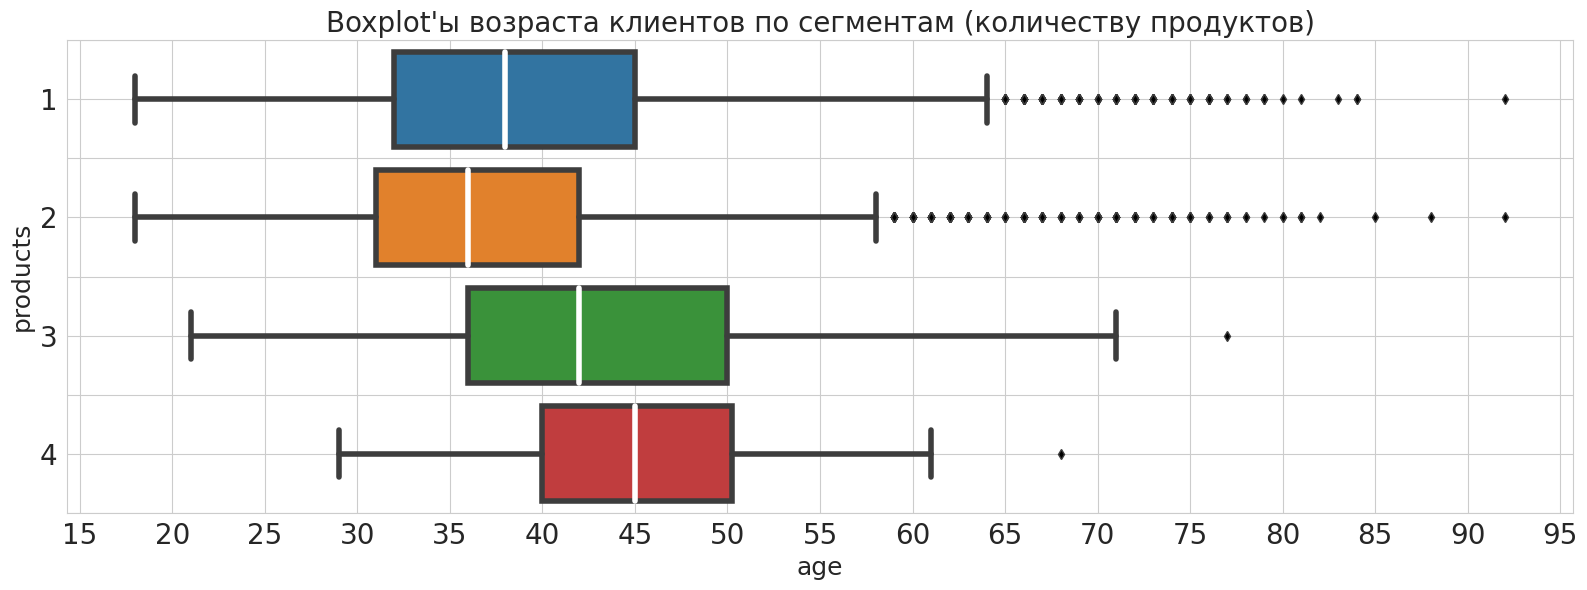

In [ ]:
boxplots_segments(_data_  = data,
_x_ ='age',
_y_ ='products',
_hue_ =None,
_title_  ="Boxplot'ы возраста клиентов по сегментам (количеству продуктов)",
_xtick_locator_ =5)

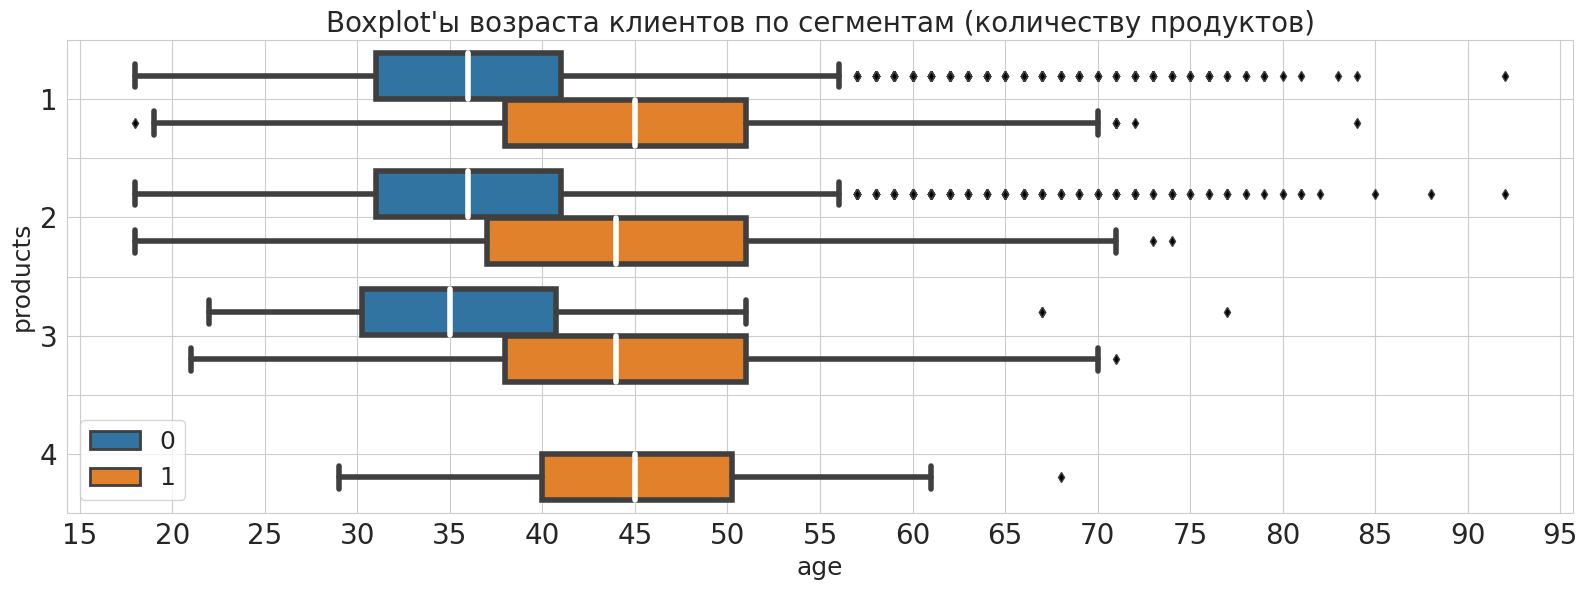

In [ ]:
boxplots_segments(_data_  = data,
_x_ ='age',
_y_ ='products',
_hue_ ='churn',
_title_  ="Boxplot'ы возраста клиентов по сегментам (количеству продуктов)",
_xtick_locator_ =5)

**Вывод:** виден общий тренд, что чем больше возраст у клиента тем больше у него продуктов.

In [ ]:
for x in data['churn'].unique():
    descr_categorial(churn_status=x,pctle=[.01,0.05,.25, .5, .75,0.95,0.99],indicator='age',low_outlier_need=False,up_outlier_need=True,
                tab_name='Таблица с общими статистиками и показателями распределения значений и выбросов по возрасту')

_______________________________________________________________________________________________________________
Таблица с общими статистиками и показателями распределения значений и выбросов по возрасту для ушедних клиентов:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


count  mean  std  min  1%  5%  25%  50%  75%  95%  99%  max  \
1     1409    44    9   18  23  29   38   45   51   61   67   84   
2      348    44   10   18  22  28   37   44   51   62   70   74   
3      220    44    9   21  22  28   38   44   51   62   68   71   
4       60    45    8   29  29  31   40   45   50   60   63   68   
all   2037    44    9   18  23  29   38   45   51   61   68   84   

     up_out_border  upper_out  upper_95%  upper_99%  pct_upper_out  
1               70          7         60         13           0.50  
2               72          2         18          3           0.57  
3               70          1          9          3           0.45  
4               65          1          2          1           1.67  
all             70         11         94         17           0.54

__________________________________________________________________________________________________________________
Таблица с общими статистиками и показателями распределения значений и выбросов по возрасту для НЕ ушедших клиентов:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


count  mean  std  min  1%  5%  25%  50%  75%  95%  99%  max  \
1     3675    37   10   18  20  24   31   36   41   60   73   92   
2     4242    37    9   18  21  24   31   36   41   57   72   92   
3       46    37   11   22  22  25   30   35   40   67   72   77   
all   7963    37   10   18  20  24   31   36   41   59   73   92   

     up_out_border  upper_out  upper_95%  upper_99%  pct_upper_out  
1               56        245        174         36           6.67  
2               56        237        213         36           5.59  
3               56          4          1          1           8.70  
all             56        486        379         70           6.10

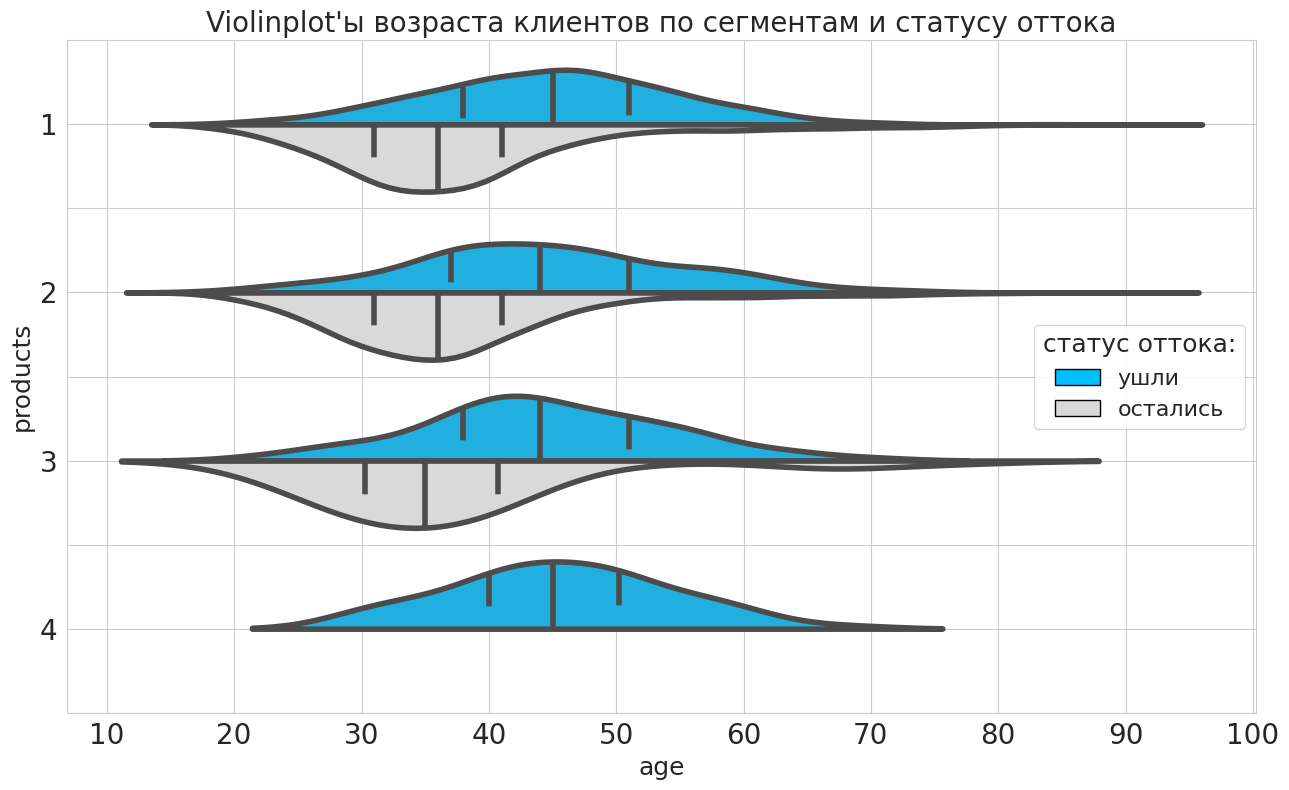

In [ ]:
violinlots_segments(_data_  = data,
_x_ ='age',
_y_ ='products',
_hue_ ='churn',
_title_  ="Violinplot'ы возраста клиентов по сегментам и статусу оттока",
_xtick_locator_ =10)

**Вывод:** из банка чаще уходят более возрастные клиенты с медианным возрастом 45 лет. Более молодые клиенты чаще остаются чем возрастные.

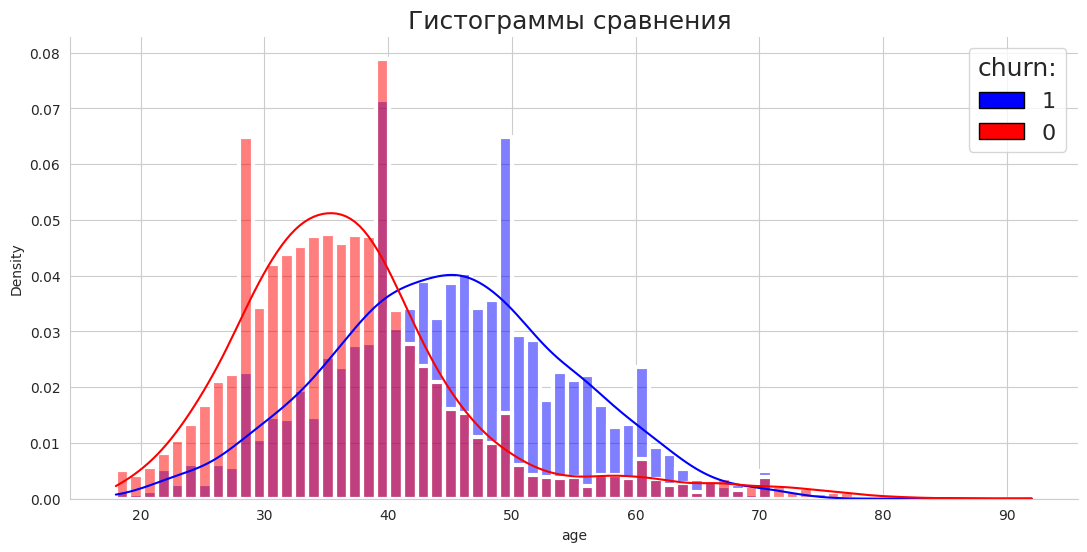

In [ ]:
hist_compare(data_x=data, _x_ ='age',  _hue_='churn',
             title_name='Гистограммы сравнения ',color1='blue',color2='red')

**Вывод:** нужно работать с более возрастной категорией. Предлагать продукты для более зрелых людей.

### Рассмотрим пользователей по количества объектов собственности у них:

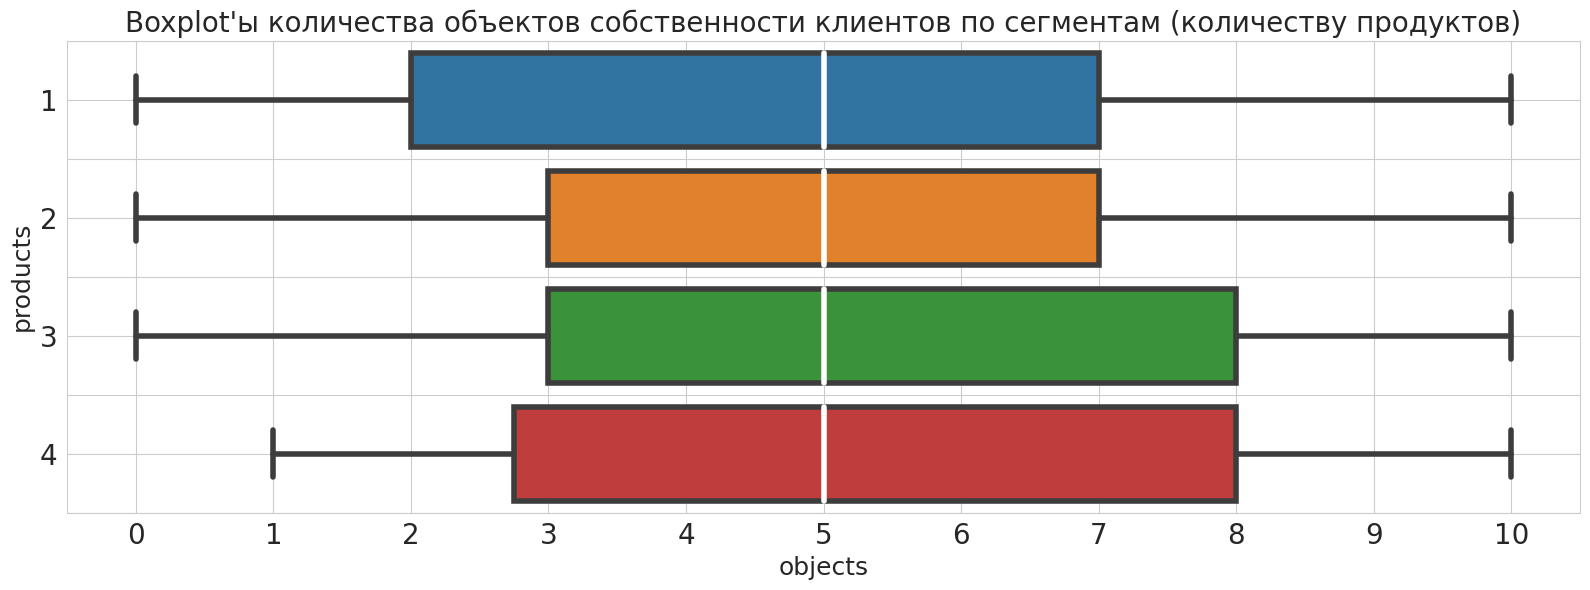

In [ ]:
boxplots_segments(_data_  = data,
_x_ ='objects',
_y_ ='products',
_hue_ =None,
_title_  ="Boxplot'ы количества объектов собственности клиентов по сегментам (количеству продуктов)",
_xtick_locator_ =1)

In [ ]:
for x in data['churn'].unique():
    descr_categorial(churn_status=x,pctle=[.01,0.05,.25, .5, .75,0.95,0.99],indicator='objects',low_outlier_need=False,up_outlier_need=False,
                tab_name='Таблица с общими показателями распределения значений и выбросов по количеству недивжимости')

_______________________________________________________________________________________________________________
Таблица с общими показателями распределения значений и выбросов по количеству недивжимости для ушедних клиентов:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


count  mean  std  min  1%  5%  25%  50%  75%  95%  99%  max
1     1409     4    2    0   0   1    2    5    7    9   10   10
2      348     4    2    0   0   0    2    5    7   10   10   10
3      220     5    2    0   0   1    3    5    8   10   10   10
4       60     5    2    1   1   1    2    5    8   10   10   10
all   2037     4    2    0   0   1    2    5    8    9   10   10

__________________________________________________________________________________________________________________
Таблица с общими показателями распределения значений и выбросов по количеству недивжимости для НЕ ушедших клиентов:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


count  mean  std  min  1%  5%  25%  50%  75%  95%  99%  max
1     3675     5    2    0   0   1    3    5    7    9   10   10
2     4242     5    2    0   0   1    3    5    8    9   10   10
3       46     4    2    1   1   1    3    4    7    9    9   10
all   7963     5    2    0   0   1    3    5    7    9   10   10

**Вывод:** Выбросов нет и медина объектов собсвенности всех сегментов равна 5.

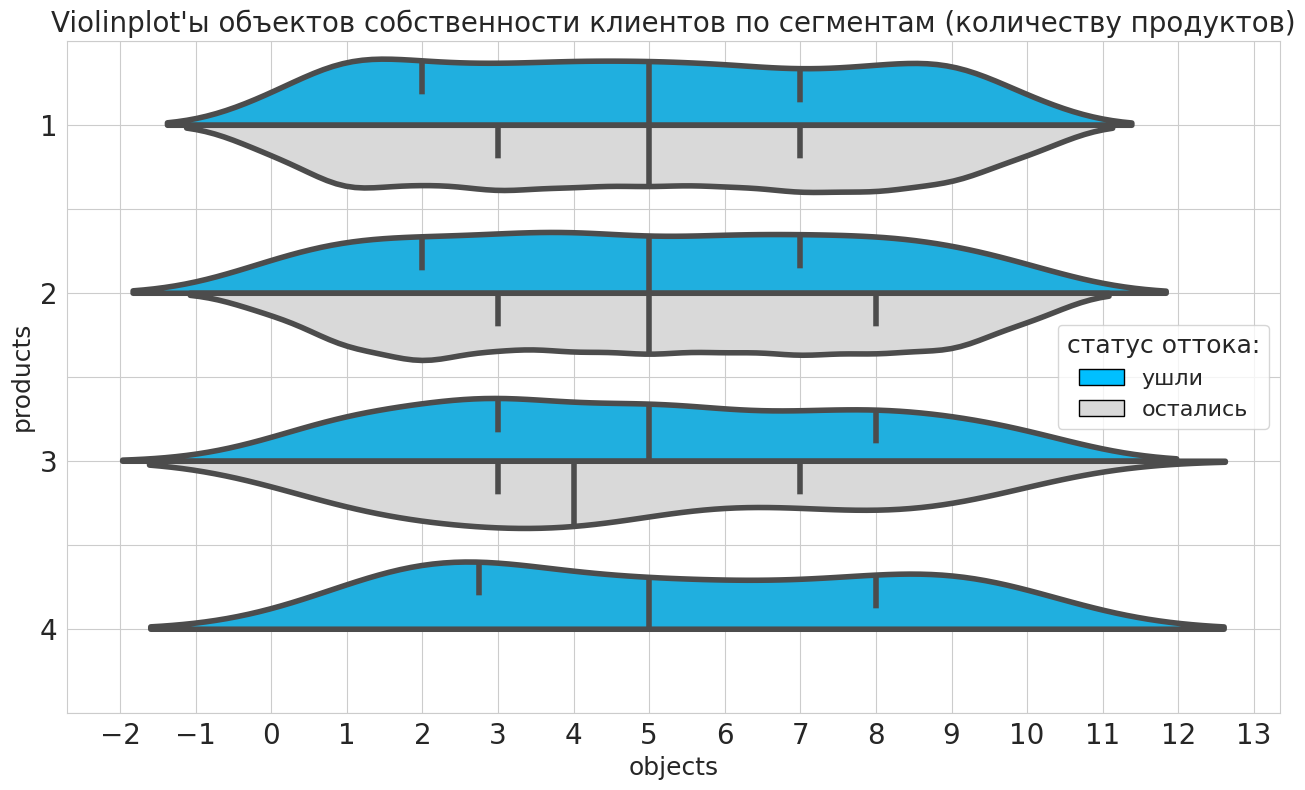

In [ ]:
violinlots_segments(_data_  = data,
_x_ ='objects',
_y_ ='products',
_hue_ ='churn',
_title_  ="Violinplot'ы объектов собственности клиентов по сегментам (количеству продуктов)",
_xtick_locator_ =1)

### Рассмотрим пользователей по их балансу:

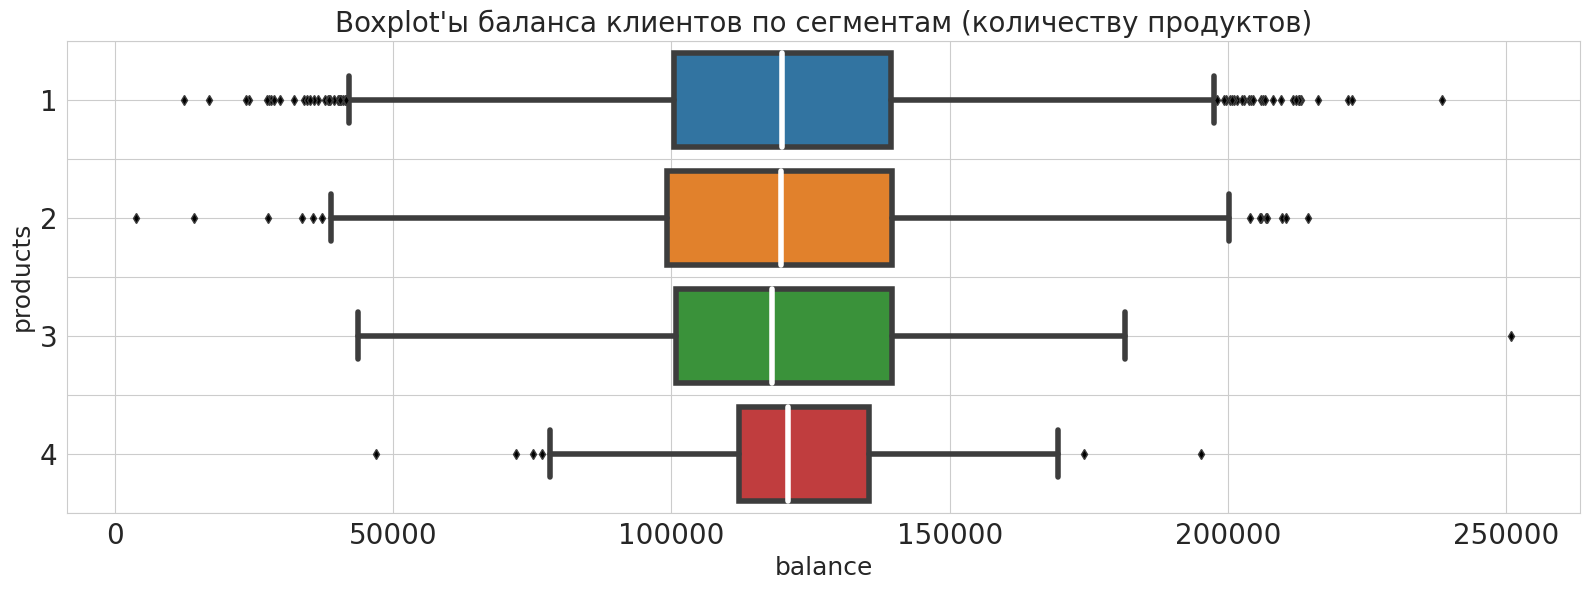

In [ ]:
boxplots_segments(_data_  = data.query('balance!=0'),
_x_ ='balance',
_y_ ='products',
_hue_ =None,
_title_  ="Boxplot'ы баланса клиентов по сегментам (количеству продуктов)",
_xtick_locator_ =None)

In [ ]:
for x in data['churn'].unique():
    descr_categorial(churn_status=x,pctle=[.01,0.05,.25, .5, .75,0.95,0.99],indicator='balance',low_outlier_need=True,up_outlier_need=True,
                tab_name='Таблица с общими статистиками и показателями распределения значений и выбросов баланса')

___________________________________________________________________________________________________________
Таблица с общими статистиками и показателями распределения значений и выбросов баланса для ушедних клиентов:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


count    mean    std    min     1%     5%     25%     50%     75%  \
1     1071  121072  30313  12459  41951  69949  103825  120392  138633   
2      262  119877  31577   3768  46526  68455  103137  118283  134992   
3      158  119542  31447  43772  44461  64181  100725  117927  139568   
4       46  122260  27761  46870  58220  75567  112063  120968  135527   
all   1537  120746  30555   3768  44121  69413  103700  119948  137986   

        95%     99%     max  low_out_border  lower_out  lower_5%  lower_1%  \
1    171252  202058  238387           51613         18        54        11   
2    175393  206412  210433           55353          4        14         3   
3    166316  179275  250898           42462          0         8         2   
4    167575  185720  195238           76867          4         3         1   
all  171443  202469  250898           52271         29        77        16   

     pct_lower_out  up_out_border  upper_out  upper_95%  upper_99%  \
1             1.68         190845         19         54         11   
2             1.53         182776          8         14          3   
3             0.00         197831          1          8          2   
4             8.70         170723          2          3          1   
all           1.89         189415         29         77         16   

     pct_upper_out  
1             1.77  
2             3.05  
3             0.63  
4             4.35  
all           1.89

______________________________________________________________________________________________________________
Таблица с общими статистиками и показателями распределения значений и выбросов баланса для НЕ ушедших клиентов:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


count    mean    std    min     1%     5%     25%     50%     75%  \
1     3108  119488  29620  16893  49560  71046   99247  119679  139617   
2     1728  119628  30513  14262  51681  70388   98767  120022  140189   
3       10  118423  34124  49508  52784  65887  102386  127221  137634   
all   4846  119535  29944  14262  49819  70675   99118  119791  139747   

        95%     99%     max  low_out_border  lower_out  lower_5%  lower_1%  \
1    168140  187474  221532           38693         11       156        32   
2    170273  189743  214346           36634          3        87        18   
3    160094  161291  161591           49514          1         1         1   
all  169025  188466  221532           38174         13       243        49   

     pct_lower_out  up_out_border  upper_out  upper_95%  upper_99%  \
1             0.35         200171         10        156         32   
2             0.17         202323          4         87         18   
3            10.00         190506          0          1          1   
all           0.27         200691         13        243         49   

     pct_upper_out  
1             0.32  
2             0.23  
3             0.00  
all           0.27

**Вывод:** У клиентов с 3 продуктами большой процент нижних выбросов. Видимо это влияение списания с карты или счета платы за услуги.

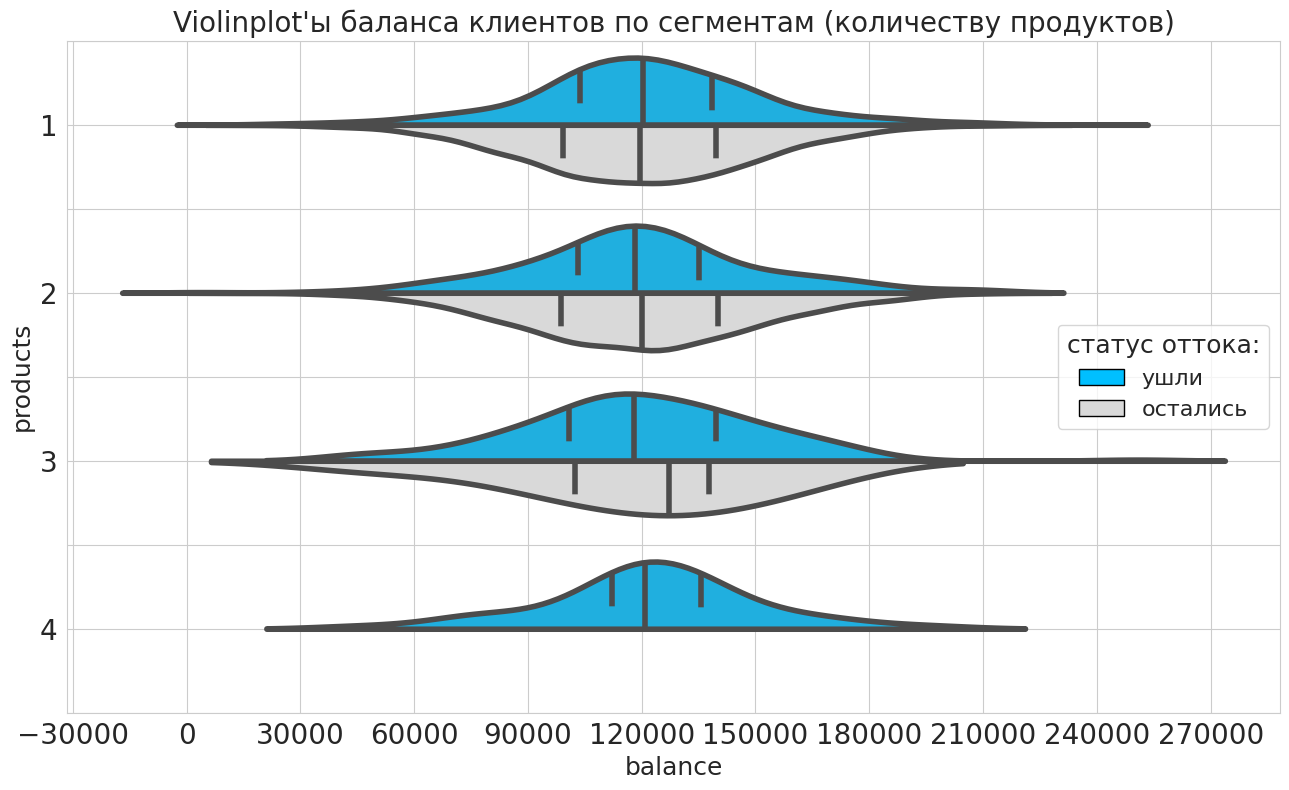

In [ ]:
violinlots_segments(_data_  = data,
_x_ ='balance',
_y_ ='products',
_hue_ ='churn',
_title_  ="Violinplot'ы баланса клиентов по сегментам (количеству продуктов)",
_xtick_locator_ =30000)

**Вывод:** хотя этот график говорит скорее о отсутствии разницы между группами клиентов.

### Рассмотрим пользователей по их расчетной зарплате:

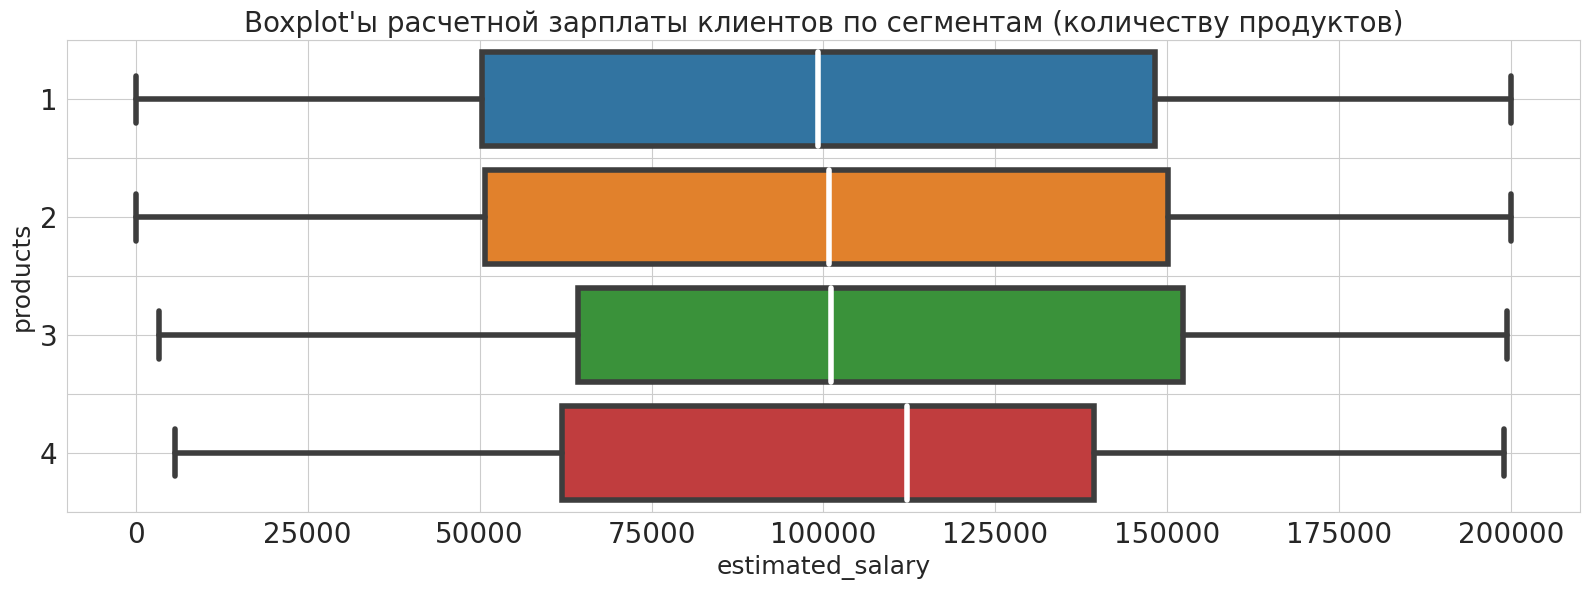

In [ ]:
boxplots_segments(_data_  = data,
_x_ ='estimated_salary',
_y_ ='products',
_hue_ =None,
_title_  ="Boxplot'ы расчетной зарплаты клиентов по сегментам (количеству продуктов)",
_xtick_locator_ =None)

In [ ]:
for x in data['churn'].unique():
    descr_categorial(churn_status=x,pctle=[.25, .5, .75],indicator='estimated_salary',low_outlier_need=False,up_outlier_need=False,
                tab_name='Таблица с общими статистиками и показателями распределения значений по оцененной зарплате')

______________________________________________________________________________________________________________
Таблица с общими статистиками и показателями распределения значений по оцененной зарплате для ушедних клиентов:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


count    mean    std   min    25%     50%     75%     max
1     1409  100639  58678    11  49833  101108  152167  199808
2      348  100883  56039    91  51731  101341  150344  197297
3      220  106776  56033  3440  64719  104612  155920  197634
4       60  104763  57526  5669  62033  112163  139371  198874
all   2037  101465  57912    11  51907  102460  152422  199808

_________________________________________________________________________________________________________________
Таблица с общими статистиками и показателями распределения значений по оцененной зарплате для НЕ ушедших клиентов:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


count    mean    std   min    25%     50%     75%     max
1     3675   99045  56853   106  50760   98646  146385  199970
2     4242  100416  57938    90  50774  100609  149809  199992
3       46   92560  51623  4733  64106   84906  126927  199357
all   7963   99738  57405    90  50783   99645  148609  199992

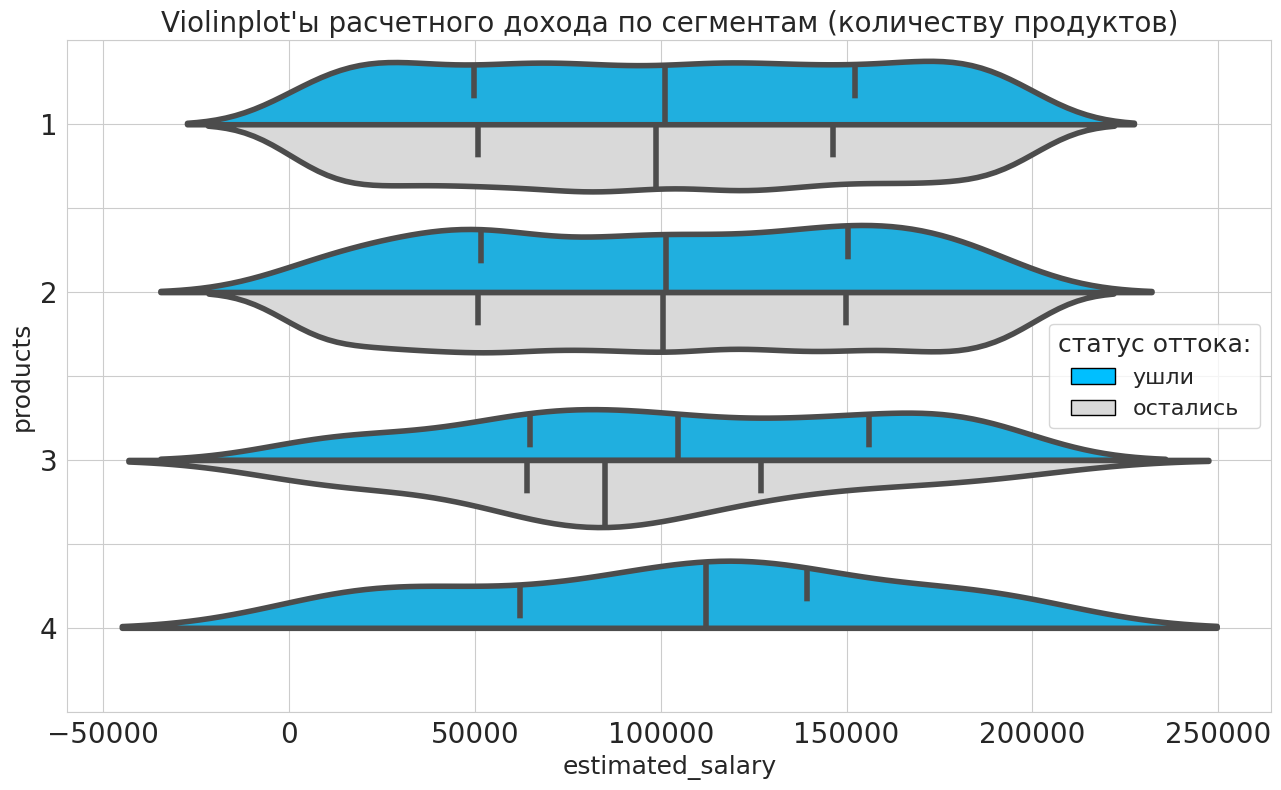

In [ ]:
violinlots_segments(_data_  = data,
_x_ ='estimated_salary',
_y_ ='products',
_hue_ ='churn',
_title_  ="Violinplot'ы расчетного дохода по сегментам (количеству продуктов)",
_xtick_locator_ =None)

### Исследуем катеогриальные значения. Рассмотрим пользователей по полу:

Сначал выясним сколько категорий в каждом категориальном парамтере:

In [ ]:
table_name('Количество категорий в каждом категориальном парамтере:')
pd.DataFrame(data[['gender','creditcard','loyalty','churn','gender_М','city_Ростов_В','city_Рыбинск','city_Ярославль']].nunique()).T

_______________________________________________________
Количество категорий в каждом категориальном парамтере::
- - - - - - - - - - - - - - - - - - - - - - - - - - - 


gender  creditcard  loyalty  churn  gender_М  city_Ростов_В  city_Рыбинск  \
0       2           2        2      2         2              2             2   

   city_Ярославль  
0               2

In [ ]:
data_churn0=data[data['churn']==0]
data_churn1=data[data['churn']==1]
data_churn0.loc[data_churn0['gender']=='Ж','gender'].count()

3404

In [ ]:
# 1 сразу для таблиц и для графиков категориальных значений:
def bar_pct_cetogoral_indicator(x,tab_name,subtitle_name, graph_name,_xtick_locator_):
    table_prod_count_indicator_churn_pct=data.pivot_table(index=['products',x],columns=['churn'],values='userid',
                                                          aggfunc='count')
    table_prod_count_indicator_churn_pct=table_prod_count_indicator_churn_pct.fillna(0)
    for g in data[x].sort_values().unique():
        table_prod_count_indicator_churn_pct.loc[('sum_y',g),0]=data_churn0.loc[data_churn0[x]==g,x].count()
        table_prod_count_indicator_churn_pct.loc[('sum_y',g),1]=data_churn1.loc[data_churn1[x]==g,x].count()
    table_prod_count_indicator_churn_pct=table_prod_count_indicator_churn_pct.fillna(0)
    table_prod_count_indicator_churn_pct['sum_x']=(table_prod_count_indicator_churn_pct[0]+
                                                   table_prod_count_indicator_churn_pct[1])
    table_prod_count_indicator_churn_pct[[0,1,'sum_x']]=table_prod_count_indicator_churn_pct[[0,1,'sum_x']].astype('int')
    table_prod_count_indicator_churn_pct['0_pct_%']=round(table_prod_count_indicator_churn_pct[0]/
                                                          table_prod_count_indicator_churn_pct['sum_x']*100,2)
    table_prod_count_indicator_churn_pct['1_pct_%']=round(table_prod_count_indicator_churn_pct[1]/
                                                          table_prod_count_indicator_churn_pct['sum_x']*100,2)

    for m in data['products'].unique():
        table_prod_count_indicator_churn_pct.loc[m,'index_diff_pct_%']=np.diff([table_prod_count_indicator_churn_pct.loc[m,'0_pct_%']])
    table_prod_count_indicator_churn_pct.loc['sum_y','index_diff_pct_%']=np.diff([table_prod_count_indicator_churn_pct.loc['sum_y','0_pct_%']])
    table_name(tab_name)


    ##########################
    display(table_prod_count_indicator_churn_pct.style.background_gradient(cmap='YlOrRd').format('{:.2f}'))
    differ=pd.DataFrame(round(
        table_prod_count_indicator_churn_pct[table_prod_count_indicator_churn_pct['index_diff_pct_%']!=0]['index_diff_pct_%']
        .droplevel(x).drop_duplicates(),2)).T
    display(differ)

    fig, axs = plt.subplots(4,1,figsize=(17,7))
    fig.suptitle(t=subtitle_name, fontsize=20)

    for n in data['products'].sort_values().unique():
        ax=table_prod_count_indicator_churn_pct.loc[n,['0_pct_%','1_pct_%']].plot(kind='barh',edgecolor='black',
                                                                               stacked=True,color=['lime','lightpink','blue'],
                                                                               legend=False,
                                                                              ax=plt.subplot(4,1,n) )

        plt.axvline(x=table_prod_count_indicator_churn_pct.loc[n,'0_pct_%'][0],linestyle='--',color='darkolivegreen')
        plt.axvline(x=table_prod_count_indicator_churn_pct.loc[n,'0_pct_%'][1],linestyle='-.',color='blue')
        plt.axvline(x=50,linestyle='-',color='black')
        plt.title(graph_name+str(' ')+str( n),fontsize=15)
        for p in ax.patches[:2]:
            percentage =round(p.get_width(),2)
            width, height =p.get_width(),p.get_height()
            x_=p.get_x()+width-4
            y=p.get_y()+height-0.4
            ax.annotate(percentage,(round(x_,2),y),fontsize=12)
        for p in ax.patches[2:]:
            percentage =round(p.get_width(),2)
            width, height =p.get_width(),p.get_height()
            x_=p.get_x()+1
            y=p.get_y()+height-0.4
            ax.annotate(percentage,(round(x_,2),y),fontsize=12)
        if _xtick_locator_ != None:
            ax.xaxis.set_major_locator(ticker.MultipleLocator(_xtick_locator_))
    lines, label = fig.axes[-1].get_legend_handles_labels()
    fig.legend(lines, labels=[data[x].unique()[0],data[x].unique()[1],'50%','остались','ушли'],
               loc = 'lower right', fontsize=14)
    plt.tight_layout()

_____________________________________________________________________
Таблица соотношения ушедших и оставшихся клиентов по полу и сегментам:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


products             1     2    3  sum_y
index_diff_pct_%  9.98  4.74  8.8   8.61

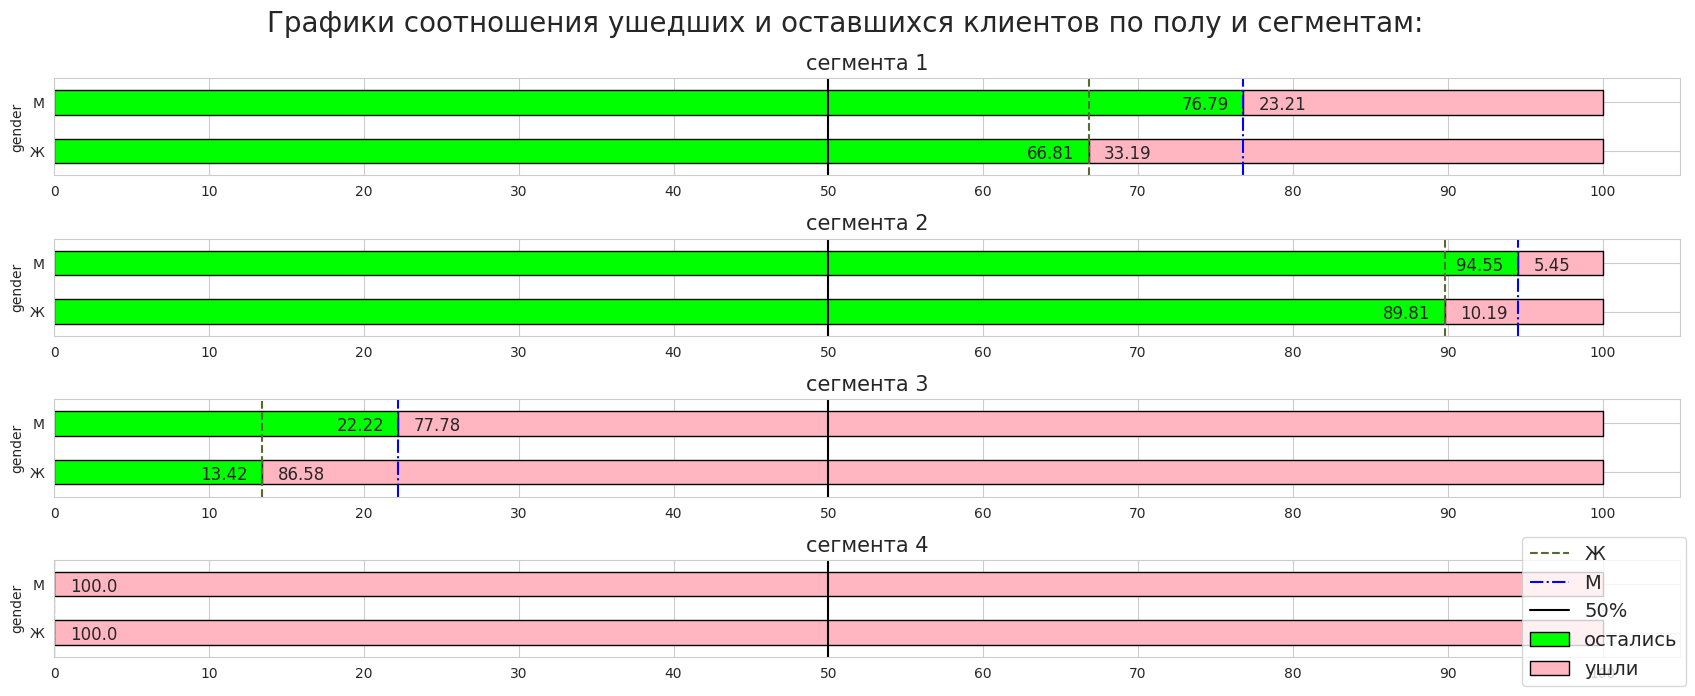

In [ ]:
bar_pct_cetogoral_indicator('gender',
                            tab_name='Таблица соотношения ушедших и оставшихся клиентов по полу и сегментам',
                            subtitle_name='Графики соотношения ушедших и оставшихся клиентов по полу и сегментам:',
                            graph_name='сегмента',
                            _xtick_locator_=10)

<div class='alert alert-info'> 🔬
Для улучшения читаемости табличных данных рекомендую в настройках пандас использовать градиентную заливку. Это значительно упрощает восприятие сухих цифр, позволяет гораздо быстрее находить минимумы и максимумы в данных. Для примера рекомендую изучить соотвествующий туториал https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
Также рекомендую делать форматирование вывода для округления цифр после запятой.


**Вывод:** женщины из первого сегмента склонны уходить на 10% чаще. А в целом женщины чаще уходят на 7-8%, по сравнению с мужчинами.

### Рассмотрим пользователей по наличию кредитной карты:

________________________________________________________________________________________
Таблица соотношения ушедших и оставшихся клиентов по наличию кредитной карты и сегментам:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


products             1     2    3  sum_y
index_diff_pct_%  0.06  1.06  2.1   0.63

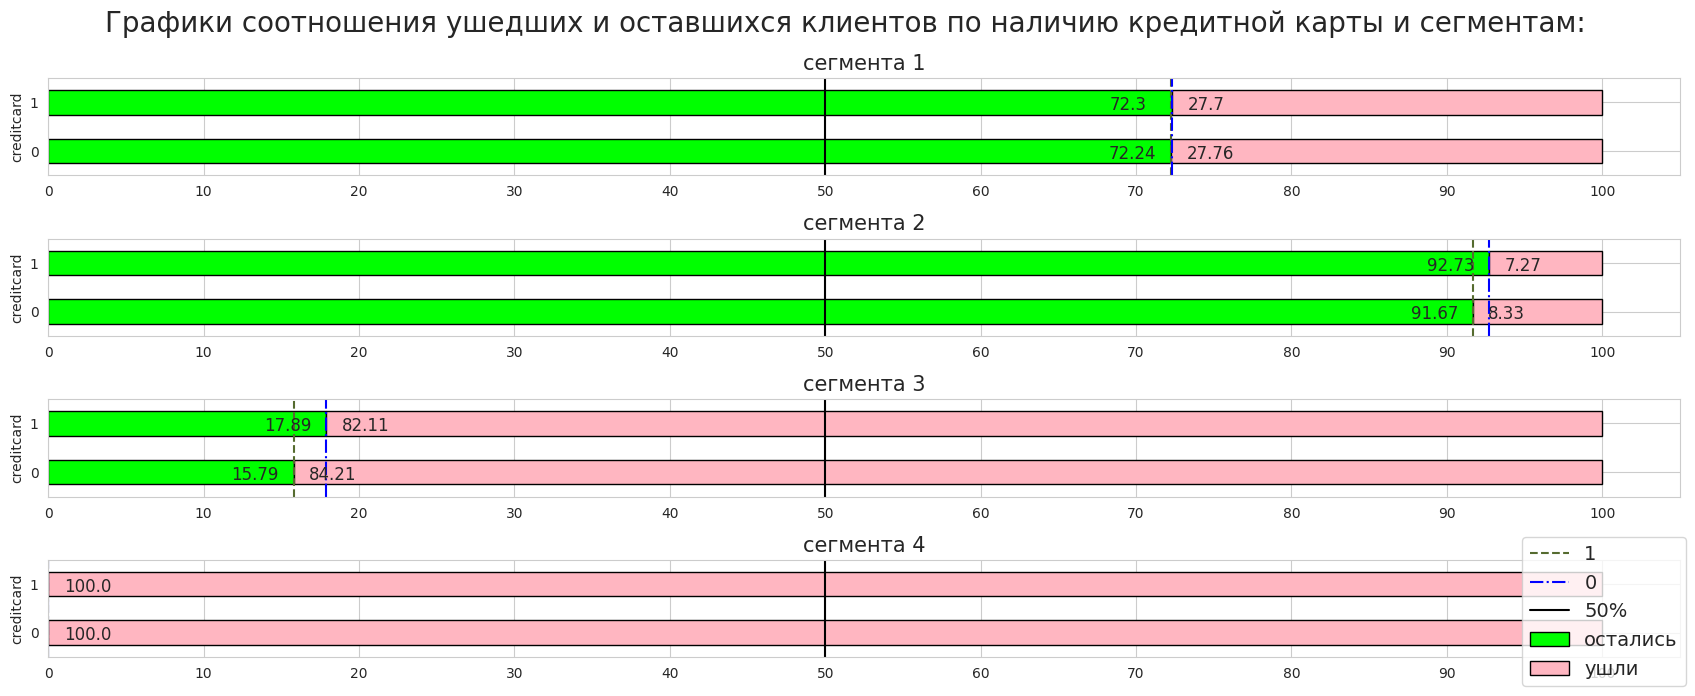

In [ ]:
bar_pct_cetogoral_indicator('creditcard',
                            tab_name='Таблица соотношения ушедших и оставшихся клиентов по наличию кредитной карты и сегментам',
                            subtitle_name='Графики соотношения ушедших и оставшихся клиентов по наличию кредитной карты и сегментам:',
                            graph_name='сегмента',
                            _xtick_locator_=10)

**Вывод:** Разницы по оттоку в сегментах в зависимости от наличия или отсутсвия кредитной карты почти нет.

### Рассмотрим пользователей по статусу лояльности:

___________________________________________________________________________________
Таблица соотношения ушедших и оставшихся клиентов по статусу лояльности и сегментам:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


products              1     2      3  sum_y
index_diff_pct_%  17.73  4.33  13.02  12.58

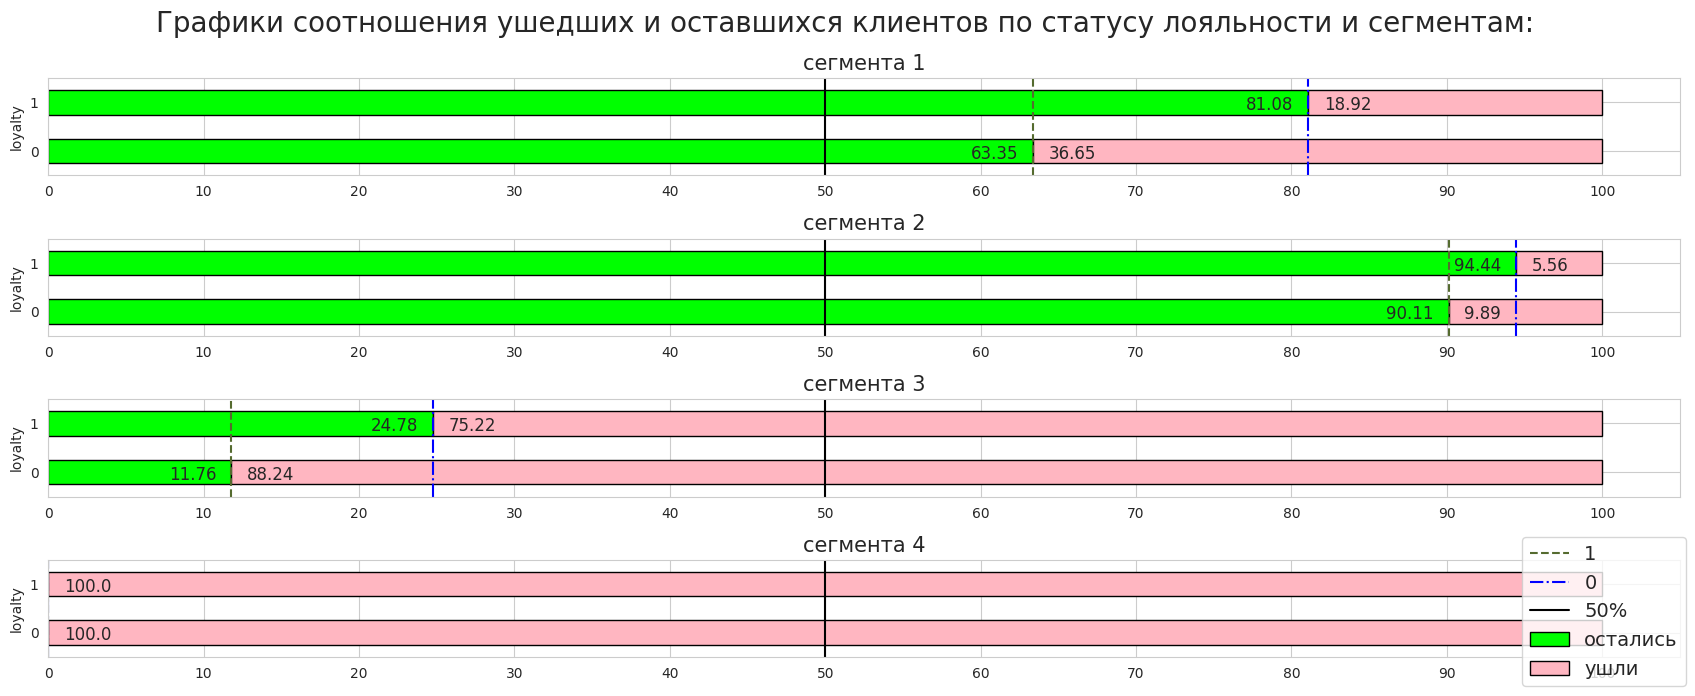

In [ ]:
bar_pct_cetogoral_indicator('loyalty',
                            tab_name='Таблица соотношения ушедших и оставшихся клиентов по статусу лояльности и сегментам',
                            subtitle_name='Графики соотношения ушедших и оставшихся клиентов по статусу лояльности и сегментам:',
                            graph_name='сегмента',
                            _xtick_locator_=10)

**Вывод:** Нелояные клиенты 1 сегмента на 17% чаще уходят чем лояльные. А в целом по всем сегментам на 12-13%.

### Рассмотрим пользователей которые живут в Рыбинске и тех кто нет:

_______________________________________________________________________________
Таблица соотношения ушедших и оставшихся клиентов по городу Рыбинск и сегментам:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


products             1     2     3  sum_y
index_diff_pct_%  7.69  0.31  5.21   4.92

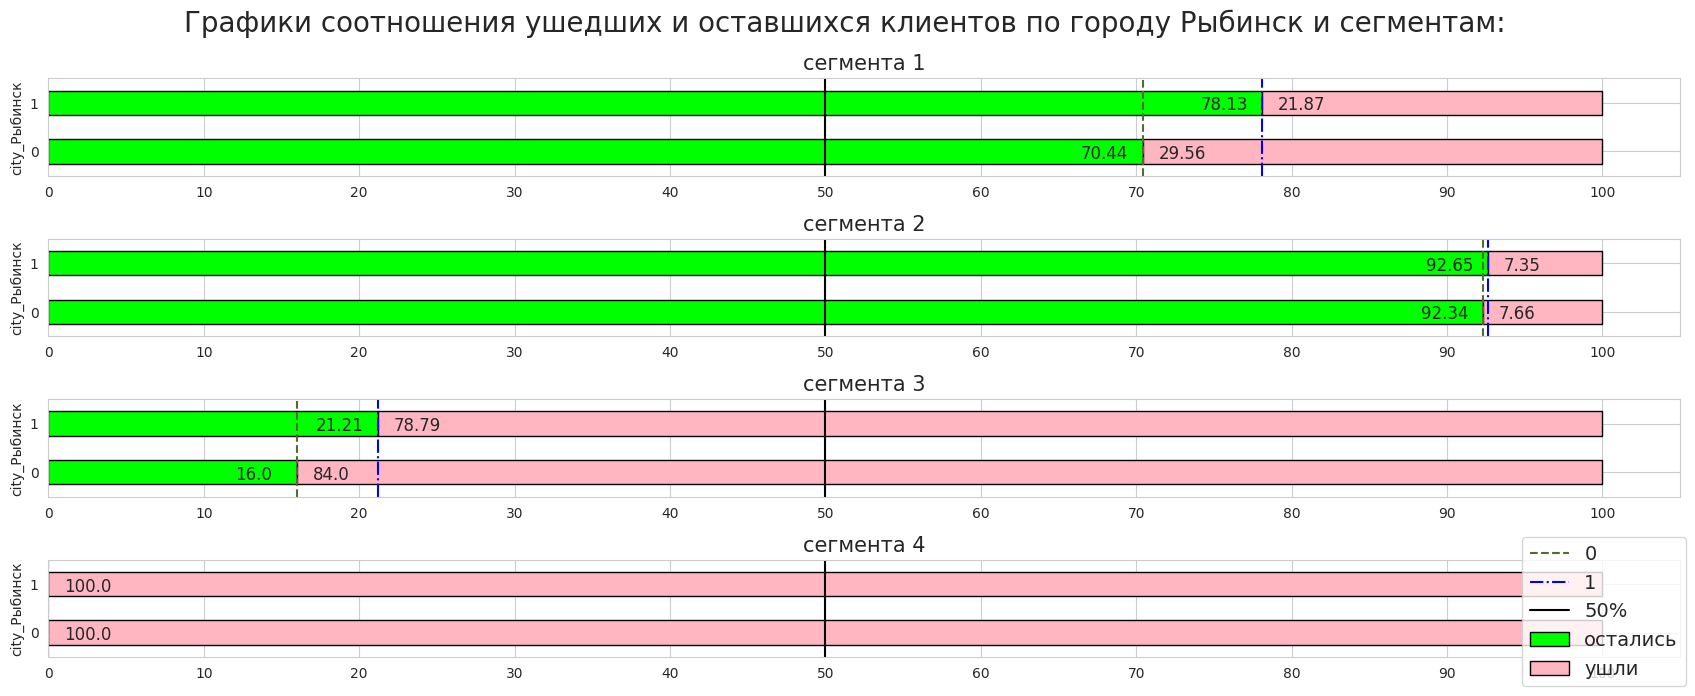

In [ ]:
bar_pct_cetogoral_indicator('city_Рыбинск',
                            tab_name='Таблица соотношения ушедших и оставшихся клиентов по городу Рыбинск и сегментам',
                            subtitle_name='Графики соотношения ушедших и оставшихся клиентов по городу Рыбинск и сегментам:',
                            graph_name='сегмента',
                            _xtick_locator_=10)

**Вывод:** в целом клиенты не из Рыбинска чаще уходят на 4-5%, чем из Рыбинска.

### Рассмотрим пользователей которые живут в Ростове Великом и тех кто нет:

______________________________________________________________________________________
Таблица соотношения ушедших и оставшихся клиентов по города Ростов Великий и сегментам:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


products             1     2      3  sum_y
index_diff_pct_% -20.6 -5.87 -10.76 -16.11

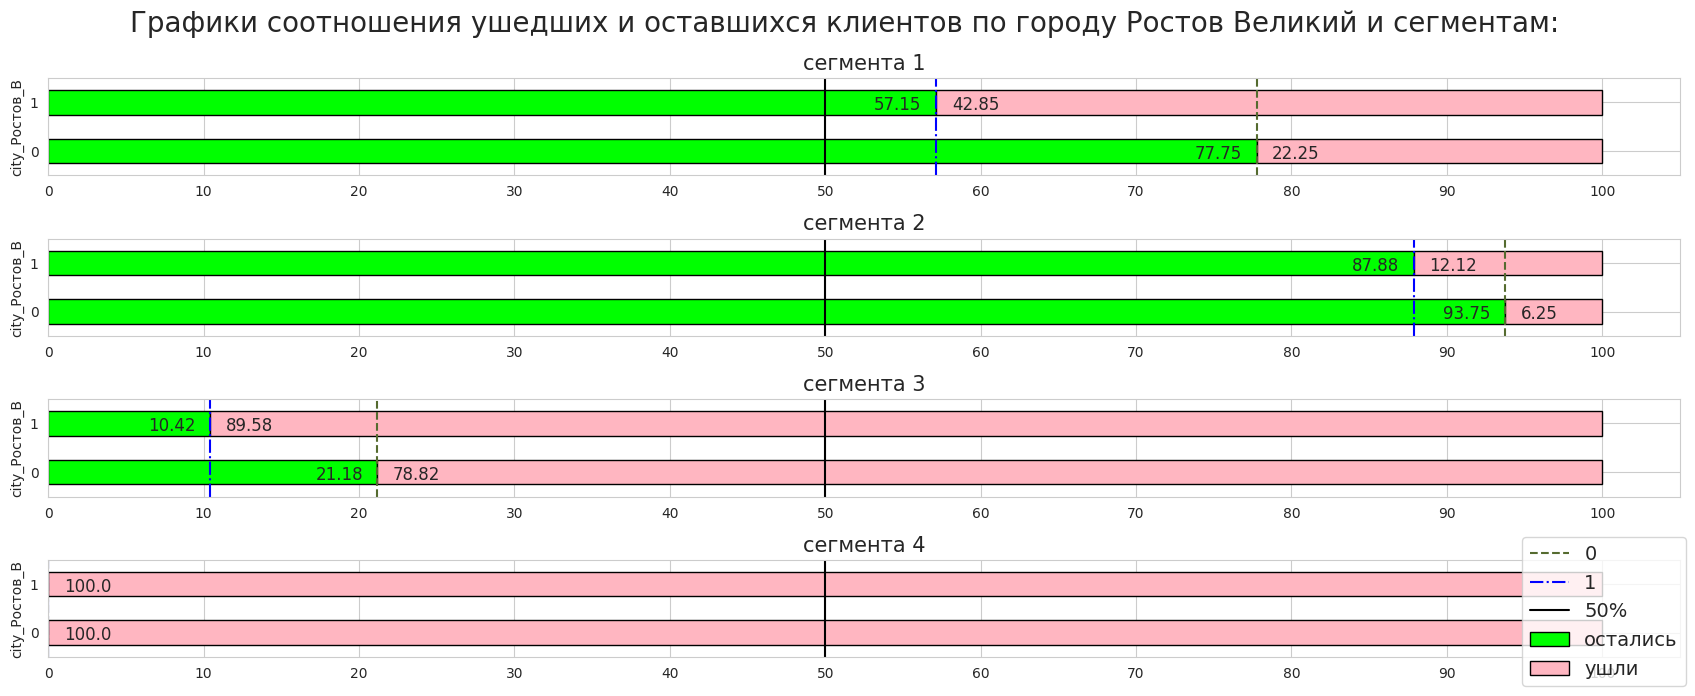

In [ ]:
bar_pct_cetogoral_indicator('city_Ростов_В',
                            tab_name='Таблица соотношения ушедших и оставшихся клиентов по города Ростов Великий и сегментам',
                            subtitle_name='Графики соотношения ушедших и оставшихся клиентов по городу Ростов Великий и сегментам:',
                            graph_name='сегмента',
                            _xtick_locator_=10)

**Вывод:** **Клиенты 1 сегмента из Ростова Великого на 20%** чаще уходят чем клиенты из других городов. В целом клиенты из Ростова Великого чаще уходят на 11-12%, чем из других.

### Рассмотрим пользователей которые живут в Ярославле и тех кто нет:

____________________________________________________________________________________________
Таблица соотношения ушедших и оставшихся клиентов по городу Ярославль лояльности и сегментам:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


products              1     2     3  sum_y
index_diff_pct_%  10.45  3.88  6.34   8.46

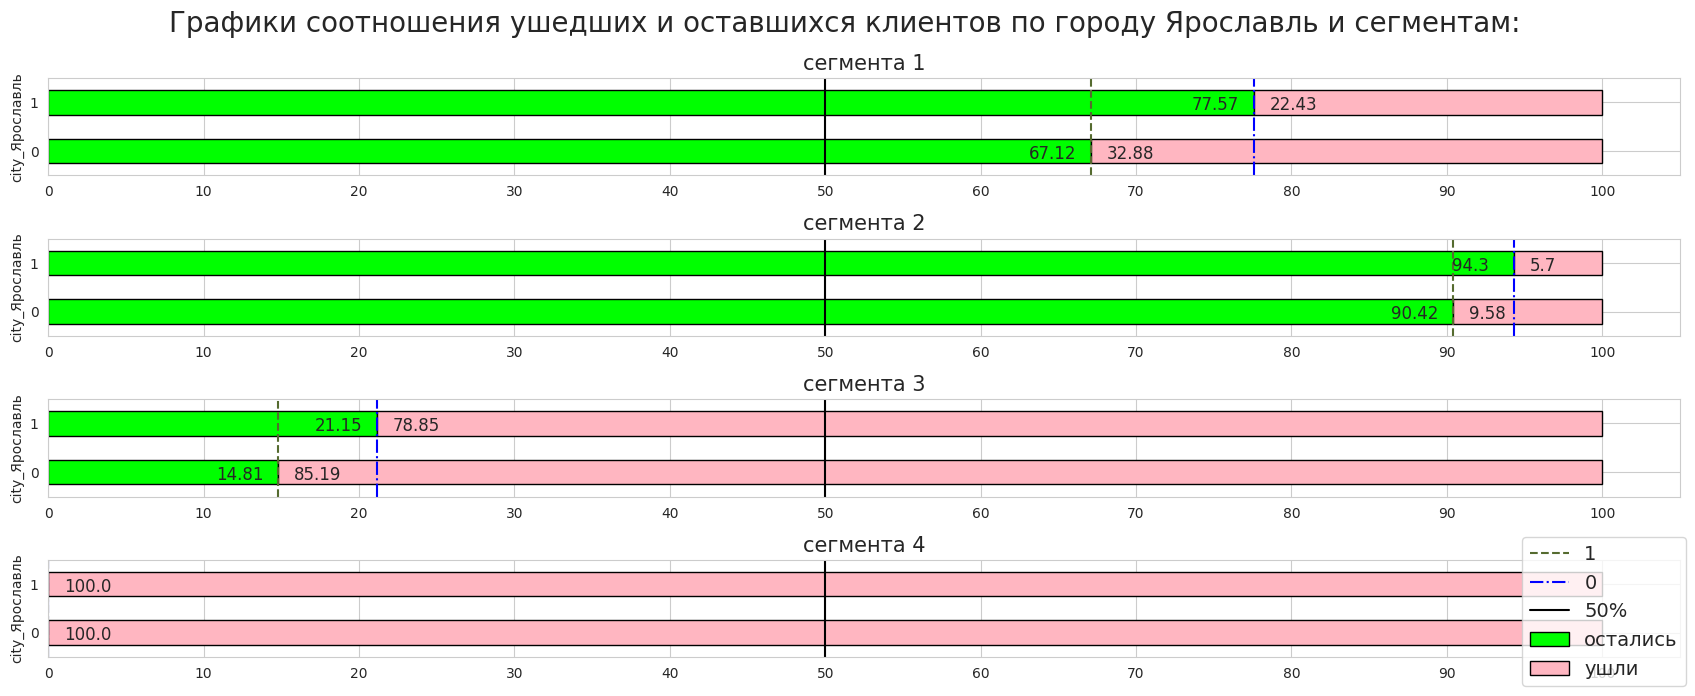

In [ ]:
bar_pct_cetogoral_indicator('city_Ярославль',
                            tab_name='Таблица соотношения ушедших и оставшихся клиентов по городу Ярославль лояльности и сегментам',
                            subtitle_name='Графики соотношения ушедших и оставшихся клиентов по городу Ярославль и сегментам:',
                            graph_name='сегмента',
                            _xtick_locator_=10)

**Вывод:** В целом клиенты из НЕ из Ярославля чаще уходят на 6-7%, чем из других городов.

**ВЫВОД:**

**Доля первых двух сегментов в структуре всех клиентов равна 96.74%. Это - 9674 пользователей. 3 и 4 сегмент малочислены.**

**Структура каждого сегмента следующая:**

*Остался - Ушел*
  
1) - 72.29 - 27.71

2) - 92.42 - 7.58

3) - 17.29 - 82.71

4) - 0.00 -- 100.00

**По круговой диаграме соотношения по сегментам видно что группы сильно отличаются по оттоку в зависимости от количества используемых продуктов. Все клиенты у которых 4 продукта отказались от услуг банка. Более 80% клиентов с 3 продуктами отказались от услуг. Это наталкивает на мысль что какой-то не самый популярный и ,возможно, дорогой продукт побуждает клиентов отказаться от сотрудничества.**


**Сделал функции для таблиц и графиков, с которыми будет работать далее в анализе категориальных данных:**

1)	boxplots_segments – функция, отображающая 4 боксплота с разными сегментами;

2)	violinplots_segments – функция, отображающая 4 	violinplot’а с разными сегментами и делением внутри сегмента, в зависимости от статусу оттока;

3)	descr_categorial – функция, отображающая таблицу со статистками и показателями распределения и выбросов зависимости от выбранного столбца с количественными данными;

4)	hist_compare – нужна для сравнения 2 гистограмм, в случае если выясняется различие в распределение групп, которые разделены по статусу оттока.

**Из всех 3 типов графиков распределения данных по колонке age (возраст) можно сделать вывод, что из банка чаще уходят более возрастные клиенты с медианным возрастом 45 лет. Более молодые клиенты чаще остаются чем возрастные. Нужно обратить внимание на эту проблему. Сделать предложения для того что бы более зрелые клиенты оставались.**

___

**Далее рассмотрим анализ категориальных переменных с помощью функции bar_pct_categorial_indicator, которая выводит таблицу процентного соотношения доли ушедших и оставшихся клиентов по сегменту и по выбранному категориальному индикатору и различия значений внутри сегмента между противоположными показателями индикатора. Далее выводит общую статистику – ведь таких разниц в процентных значениях – 4 и потом сам график (столбчатую диаграму с накоплением) соотношения оставшихся и ушедших по сегменту и индикатору.**

1)	Женщины из первого сегмента склонны уходить на 10% чаще. В целом женщины чаще уходят на 7-8%, по сравнению с мужчинами;

2)	Нелояные клиенты 1 сегмента на 17% чаще уходят чем лояльные. В целом по всем сегментам на 12-13% так же чаще уходят нелояльные. Этот индикатор в целом выполняет свое предназначение для аналитика и помогает отток;

3)	Клиенты 1 сегмента из Ростова Великого на 20% чаще уходят чем клиенты из других городов. В целом клиенты из Ростова Великого чаще уходят на 11-12%, чем из других. Первый сегмент достаточно многочисленен поэтому проблема частого ухода клиентов из Ростова Великого существенна.


## Проверить статистические гипотезы

Буду использовать данную схему для определения критерия проверки гипотез: 


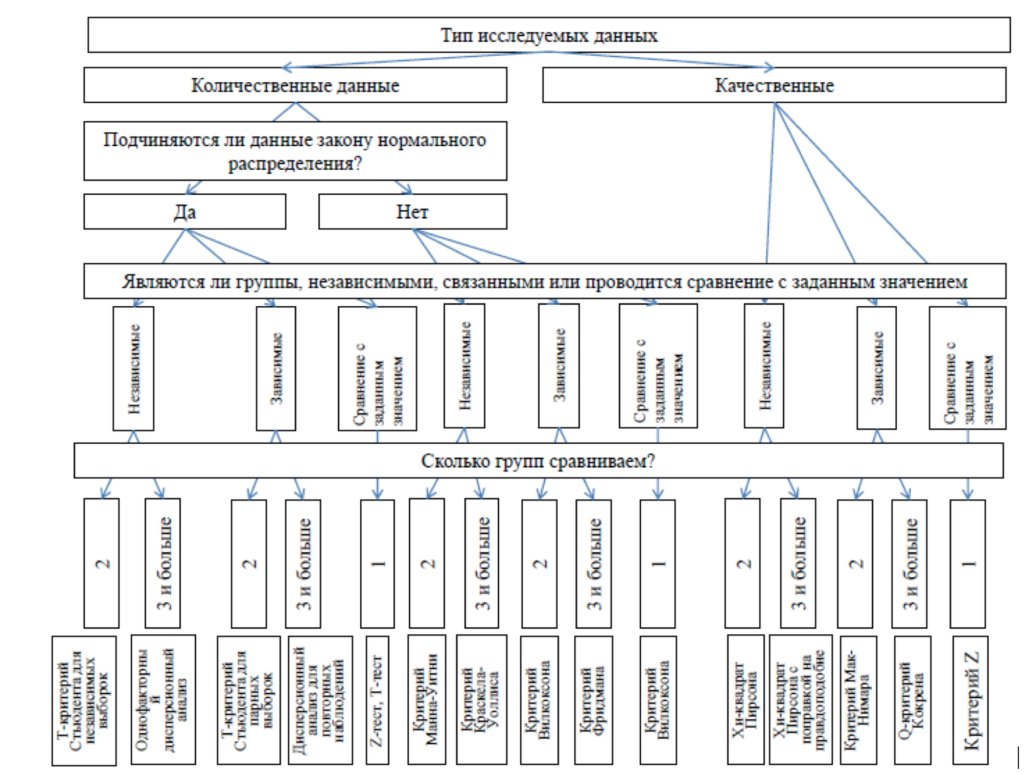

In [ ]:
print('Буду использовать данную схему для определения критерия проверки гипотез: ')
Image("https://lit-review.ru/wp-content/uploads/2018/04/vibor_stat_kriteria-1024x774.png", width=800, height=240)

In [ ]:
def distribution(x,xlim_min):
    sns.set_palette('coolwarm')
    sns.set_style('darkgrid')
    sns.set (font_scale= 1.2 )#
    plt.subplots_adjust(wspace=50, hspace=50)
    fig,axs=plt.subplots(1,3,figsize=(18, 8))
    fig.suptitle('Как распределены данные колонки  '+str(x)+str('                                            QQ_plot  ')+str(x),
                 fontsize=20)
    ax1 = plt.subplot2grid((1,3),(0,0),colspan = 2)
    ax2 = plt.subplot2grid((1,3),(0,2), rowspan = 1)
    ax1=sns.histplot(data[x],label =x,color='black',legend=True,common_norm=False,stat="density",kde=True,
                   facecolor='black',ax=plt.subplot2grid((1,3),(0,0),colspan = 2))
    plt.xlabel(x,fontsize=14)
    ax1=sns.kdeplot(np.random.gamma(shape=2,scale=data[x].std(),size=10000),legend=True,label='gamma',linewidth =5,color='red')
    ax1=sns.kdeplot(np.random.normal(loc=data[x].mean(),scale=data[x].std(),size=10000),label='normal',linewidth =5,color='green')
    ax1=sns.kdeplot(np.random.exponential(scale=data[x].std(),size=10000),label='exponential',linewidth =5,color='blue')
    plt.xlim(xlim_min,data[x].max()*1.2)
    ax1.legend(fontsize=15)
    ax2= sm. qqplot(data=data[x],line='q',color='yellow',markerfacecolor='black',ax=plt.subplot2grid((1,3),(0,2), rowspan = 1))
    plt.tight_layout()
    sns.despine()

### Проверить гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

- **H₀:** Доходы клиентов пользующиеся 1 и 2 продуктами не различаются;
- **H₁:** Доходы клиентов пользующиеся 1 и 2 продуктами различаются.

**Для начала проверим распределение скоринга на нормальное и другие распределение:**

<Figure size 640x480 with 0 Axes>

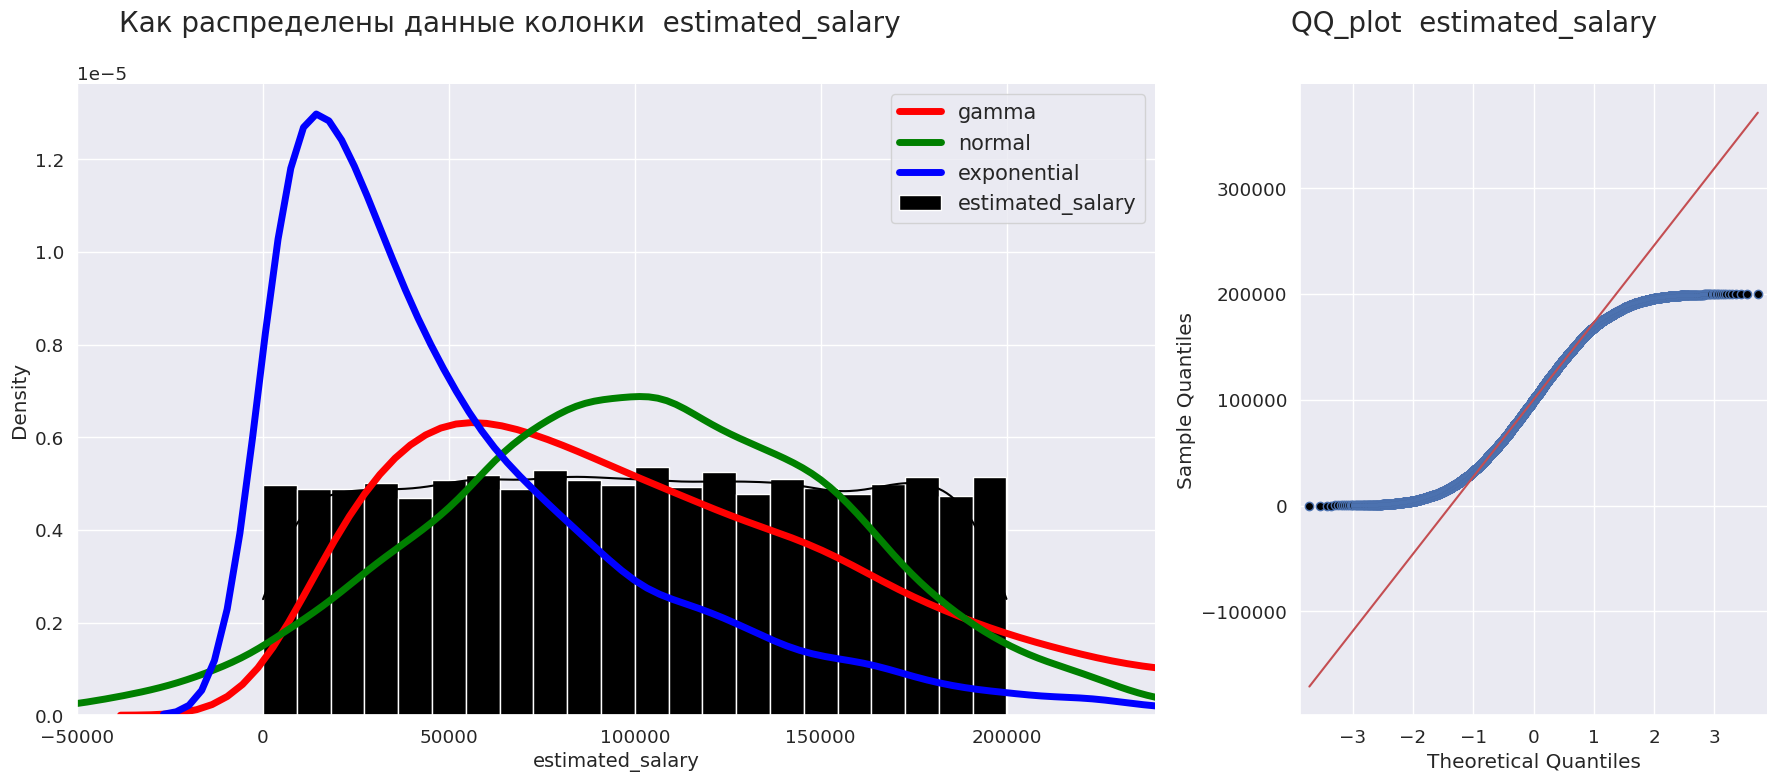

In [ ]:
distribution('estimated_salary',xlim_min=-50000)

**Вывод:** данный показатель имеет равномерное распределение.

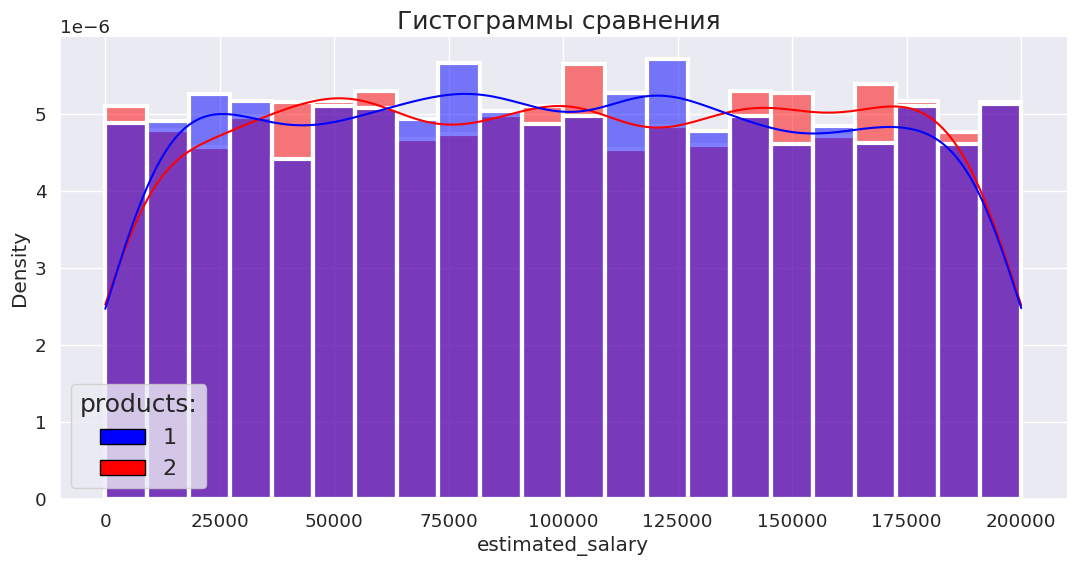

In [ ]:
hist_compare(data_x=data.query('products<=2'), _x_ ='estimated_salary',  _hue_='products',
             title_name='Гистограммы сравнения ',color1='blue',color2='red')

In [ ]:
results=st.mannwhitneyu(data_1['estimated_salary'],data_2['estimated_salary'])
print('Тест Манна-Уитни:')
print('p-значение:', results.pvalue)
alpha=0.05
if alpha>results.pvalue:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Тест Манна-Уитни:
p-значение: 0.4079566651927651
Не получилось отвергнуть нулевую гипотезу


**Вывод:** По тесту Манна-Уитни можно сделать вывод о том что нельзя отвергнуть 0 гипотезу, то есть нельзя сказать, что выборки разные.

### Проверить гипотезу различия баллов кредитного скоринга между клиентами с разным количеством используемых продуктов (1-2; 1-3; 1-4; 2-3; 2-4 и 3-4)

- **H₀:** Баллы кредитного скоринга у клиентов из двух сравневыемых сегментов не различаются;
- **H₁:** Баллы кредитного скоринга у клиентов из двух сравневыемых сегментов различаются.

<Figure size 640x480 with 0 Axes>

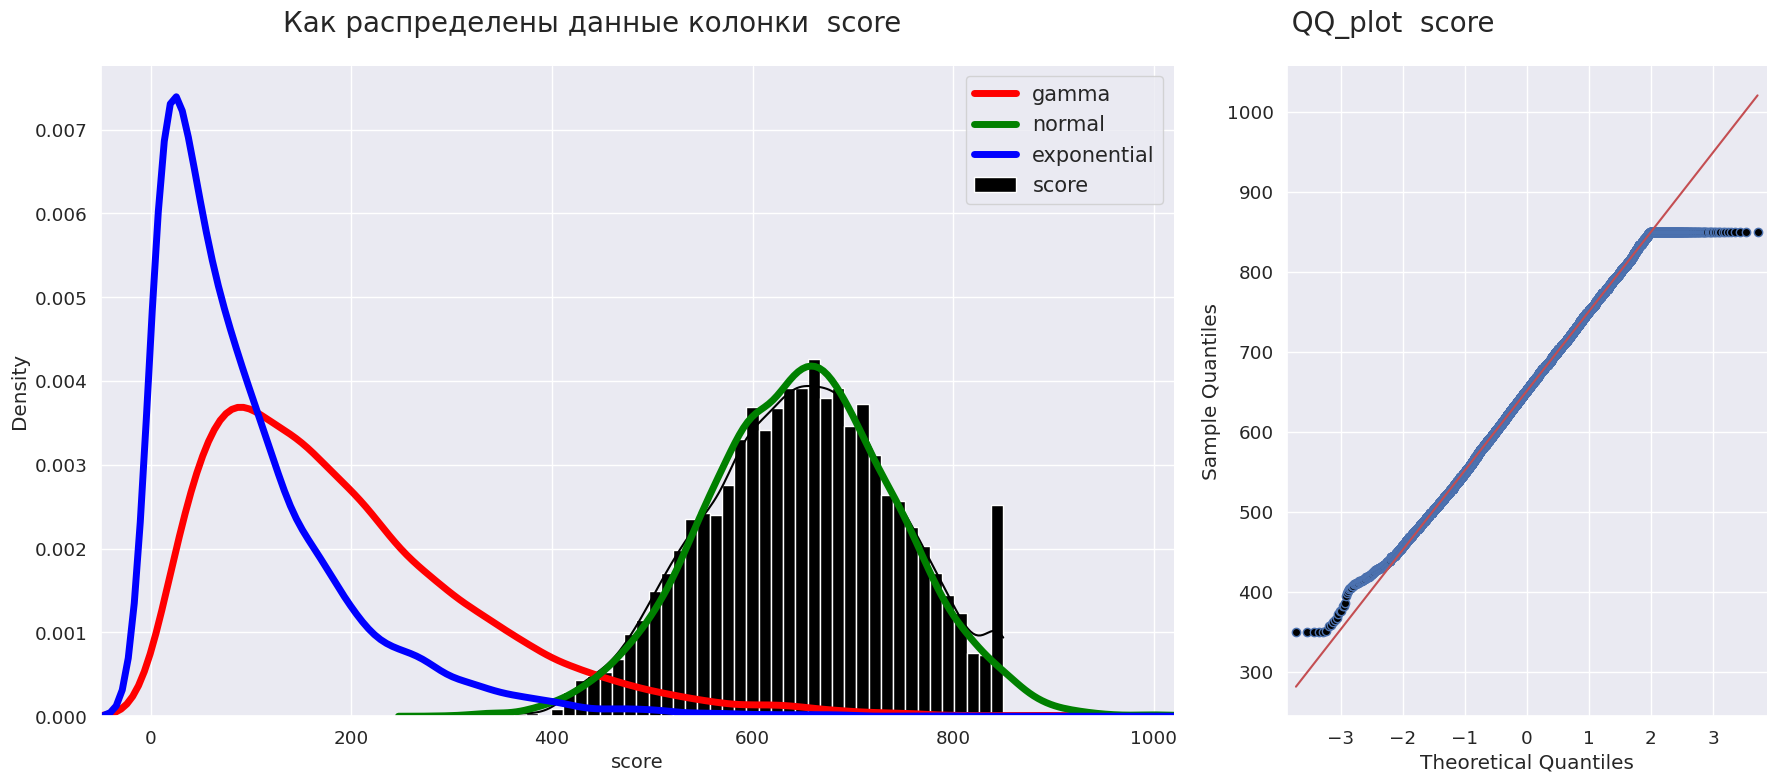

In [ ]:
distribution('score',xlim_min=-50)

**Вывод:** данные распределены нормально.

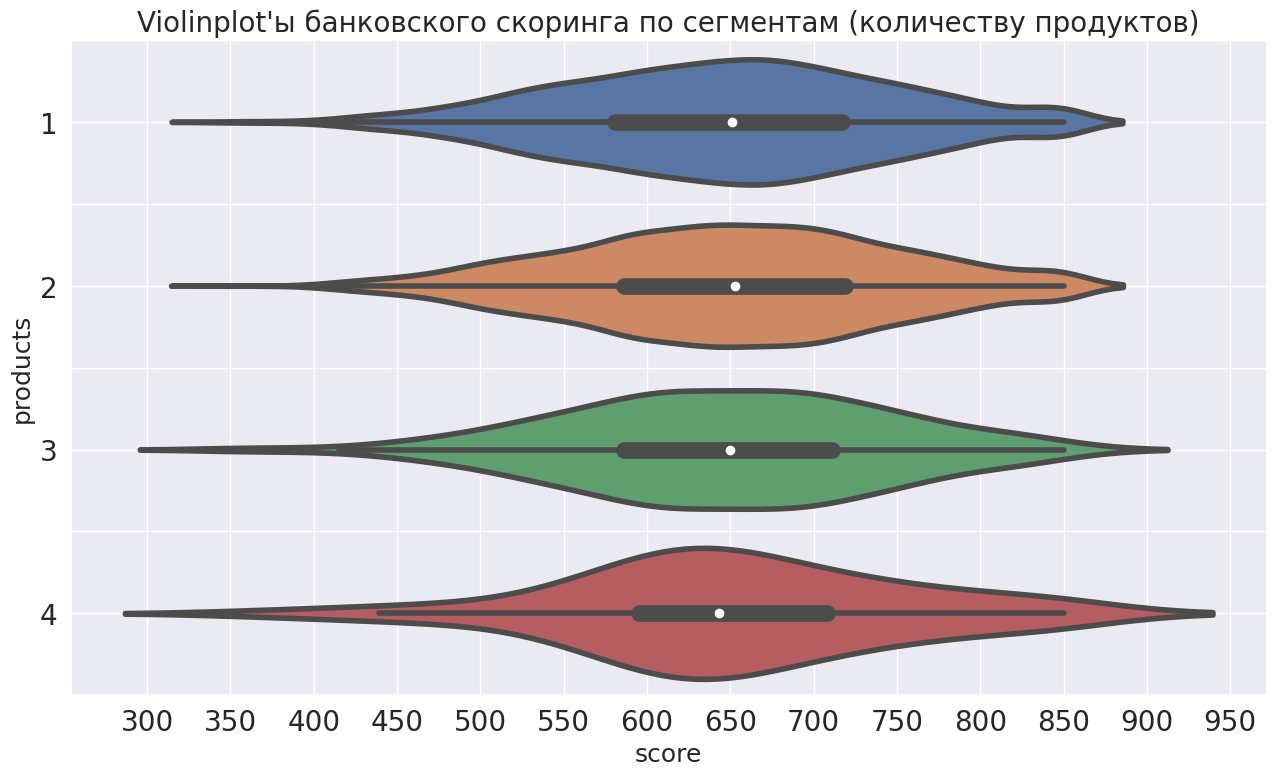

In [ ]:
violinlots_segments(_data_  = data,
_x_ ='score',
_y_ ='products',
_hue_ =None,
_title_  ="Violinplot'ы банковского скоринга по сегментам (количеству продуктов)",
_xtick_locator_ =50)

**Вывод:** Распределение схожи.

In [ ]:
n_n=[]
n=0
for x in data['products'].unique():
    for y in data['products'].unique():
        if x!=y:
            n+=1
            n_n.append(n)
n=0
for x in data['products'].unique():
    for y in data['products'].unique():
        if x!=y:
            n+=1
            results=st.ttest_ind(data.loc[data['products']==x,'score'],data.loc[data['products']==y,'score'],equal_var= False)
            alpha=0.05
            if n==1:
                ttest=pd.DataFrame({'n':n_n,'x':n_n,"y":n_n,'p-значение':n_n})
            ttest.loc[ttest['n']==n,'x']=x
            ttest.loc[ttest['n']==n,'y']=y
            ttest.loc[ttest['n']==n,'p-значение']=results.pvalue
            if alpha>results.pvalue:
                ttest.loc[ttest['n']==n,'conclusion']='Отвергаем нулевую гипотезу'
            else:
                ttest.loc[ttest['n']==n,'conclusion']='Не получилось отвергнуть нулевую гипотезу'

In [ ]:
table_name('Таблица pvalue при сравнении выборок по всех различным сегментам критерием Стьюдента с выводом')
ttest.sort_values(by=['x','y']).drop_duplicates(subset=['p-значение']).drop(columns='n').reset_index(drop=True)

______________________________________________________________________________________________
Таблица pvalue при сравнении выборок по всех различным сегментам критерием Стьюдента с выводом:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


x  y  p-значение                                 conclusion
0  1  2    0.118893  Не получилось отвергнуть нулевую гипотезу
1  1  3    0.865547  Не получилось отвергнуть нулевую гипотезу
2  1  4    0.735418  Не получилось отвергнуть нулевую гипотезу
3  2  3    0.497124  Не получилось отвергнуть нулевую гипотезу
4  2  4    0.915888  Не получилось отвергнуть нулевую гипотезу
5  3  4    0.702962  Не получилось отвергнуть нулевую гипотезу

**Вывод:** нельзя утвержать что эти распределения являются различными. Значит все они сильно схожи.

### Проверим гипотезу различия возраста ушедших и оставшихся клиентов:

- **H₀:** Возраст у ушедших и оставшихся клиентов не различаются;
- **H₁:** Возраст у ушедших и оставшихся клиентов различаются;

<Figure size 640x480 with 0 Axes>

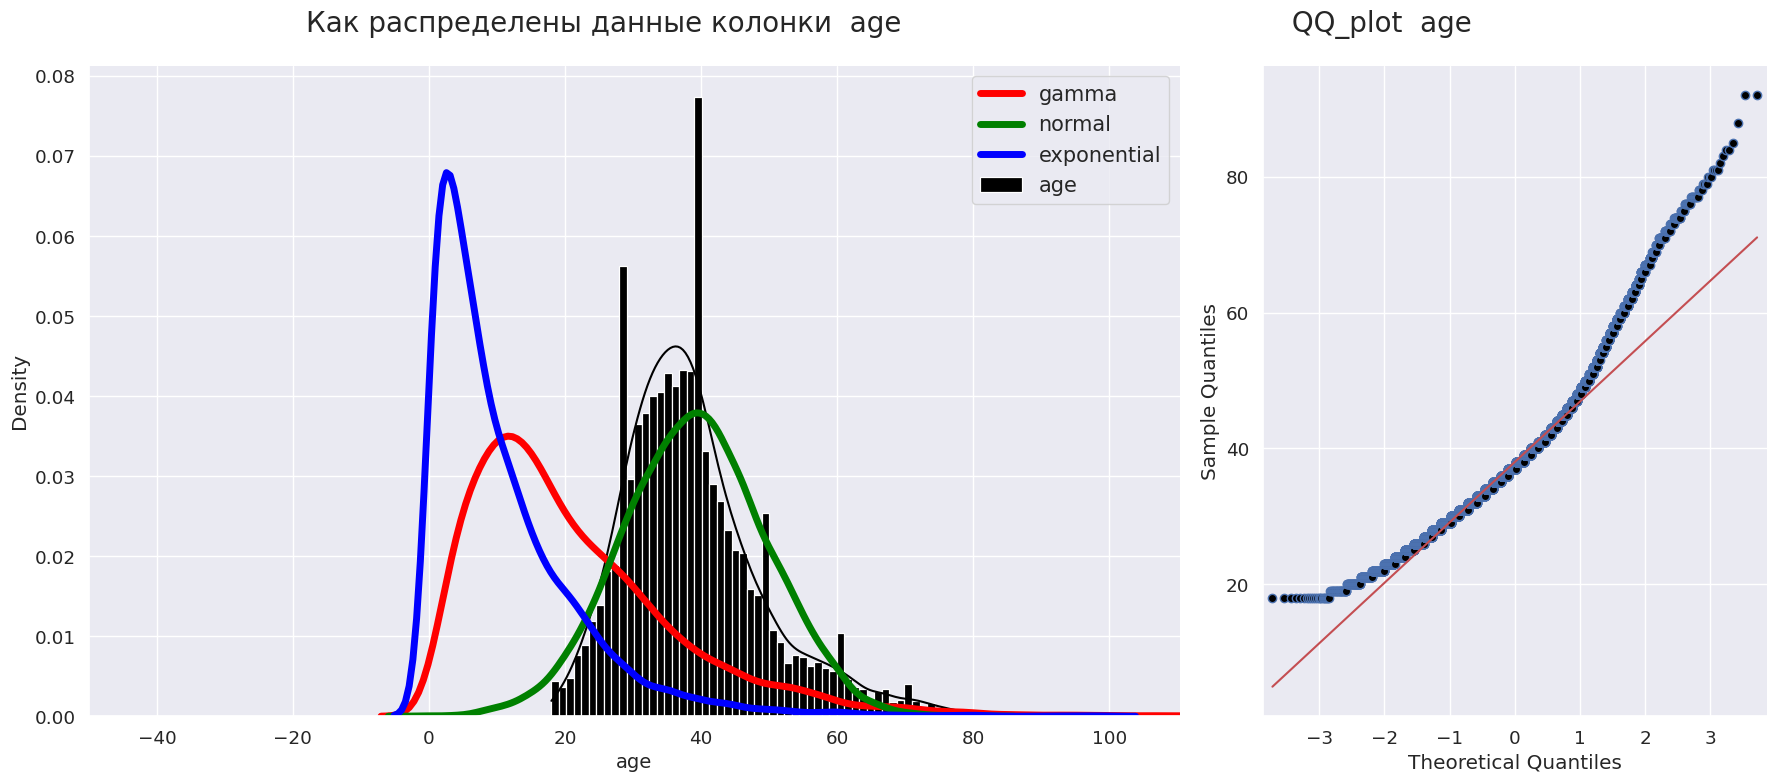

In [ ]:
distribution('age',xlim_min=-50)

**Вывод:** данные близки к нормальному распределению

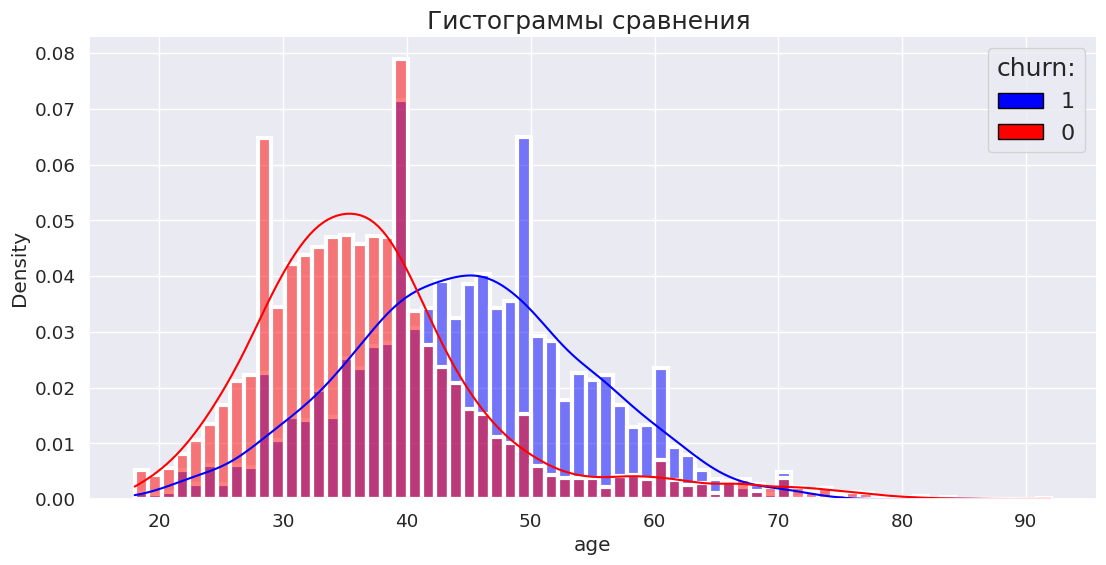

In [ ]:
hist_compare(data_x=data, _x_ ='age',  _hue_='churn',
             title_name='Гистограммы сравнения ',color1='blue',color2='red')

In [ ]:
results=st.mannwhitneyu(data.query('churn==1')['age'],data.query('churn==0')['age'])
print('Тест Манна-Уитни:')
print('p-значение:', results.pvalue)
alpha=0.05
if alpha>results.pvalue:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Тест Манна-Уитни:
p-значение: 3.2104014319371675e-230
Отвергаем нулевую гипотезу


In [ ]:
results=st.ttest_ind(data.query('churn==1')['age'],data.query('churn==0')['age'])
print('Тест Стьюдента:')
print('p-значение:', results.pvalue)
alpha=0.05
if alpha>results.pvalue:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Тест Стьюдента:
p-значение: 1.2399313093427738e-186
Отвергаем нулевую гипотезу


**Вывод:** Тест Манна-Уитни и тест Стьюдента говорят о том что выборки статистически значимо отличаются.

**ВЫВОД:**

**Для определения критерия пользовался схемой, что находится в начале 5 пункта**

**Для определения критерия с помощью функции destribution, которая строит пару графиков: график histplot, на котором можно сравнить распределение с нормальным, гамма- и эскпоненциальным распределениями. Пр графику QQplot можно определить нормально ли распределены данные.
Далее сравнивая 2 гистограммы распределение с помощью ранее заданной функции hist_compare.**

1)	**Первая гипотеза говорит о различии в доходе (estimated_salary) у клиентов в 1 и 2 сегментах:**

- **H₀:** Доходы клиентов пользующиеся 1 и 2 продуктами не различаются;
- **H₁:** Доходы клиентов пользующиеся 1 и 2 продуктами различаются.

Данные по оцененной зарплате распределены не нормально – они распределены равномерно. При сравнении 2 гистограмм с разными сегментами визуально не видно разницы между распределениями. Для такого рода данных был выбран тест Манна-Уитни. P-value получилось равным около 0.4. Не отвергаем 0 гипотезу, что значит нельзя утверждать, что выборки разные.

**ВЫВОД: H₀: Доходы клиентов пользующиеся 1 и 2 продуктами не различаются;**
___
2)	**Вторая гипотеза говорит о различии в баллах кредитного скоринга (score) у клиентов во всех различных сегментах:**

- **H₀:** Баллы кредитного скоринга у клиентов из двух сравневыемых сегментов не различаются;
- **H₁:** Баллы кредитного скоринга у клиентов из двух сравневыемых сегментов различаются.

Данные по оцененной зарплате распределены нормально, это подтверждают оба графика. При сравнении 4 гистограмм с разными сегментами визуально не видно разницы между распределениями. Для такого рода данных был выбран критерий Стьюдента. Самое маленькое p-value=0.11 а за ним уже 0.49 из чего можно сделать общий вывод о том, что нельзя отвергнуть нулевую гипотезу – выборки сильно схожи.

**ВЫВОД: H₀:Баллы кредитного скоринга у клиентов из двух сравневыемых сегментов не различаются;**
___
3)	**Третья гипотеза говорит о различии в распределении возраста (age) у ушедших и оставшихся клиентов:**

- **H₀:** Возраст у ушедших и оставшихся клиентов не различаются;
- **H₁:** Возраст у ушедших и оставшихся клиентов различаются;

Данные по возрасту распределены близко к нормальному распределению. При сравнении 2 гистограмм с разных статусов оттока визуально видно как одна гистограмма смещена относительно другой. Возраст ушедших клиентов как правило выше на 10 лет. Для такого рода данных больше подходит критерий Стьюдента, однако на всякий случай проверим дополнительно и тестов Манна-Уитни. При проверке оба теста выдают результаты очень близкие к нулю. Нулевую гипотезу отвергаем. Значит выборки статзначимо различаются, а распределения являются различными.

**ВЫВОД: H₁: Возраст у ушедших и оставшихся клиентов различаются.**


## Заключение:

Вывел data - датасет, содержащий информацию о клиентах банка «Метанпром».

Применил one-hot кодировку к столбцу city.

Доля первых двух сегментов в структуре всех клиентов равна 96.74%. Это - 9674 пользователей. 3 и 4 сегменты малочисленны.
Структура каждого сегмента следующая. Также в первых двух сегментах большой процент отсавшихся (не ушедших), а в последних двух (3 и 4) процент ушедших большой: 83% и 100% (4 клиенты все ушли в отток) соответственно. Это наталкивает на мысль что какой-то не самый популярный и ,возможно, дорогой продукт побуждает клиентов отказаться от сотрудничества.


Показатель 0.32 при рассмотрении показателей корреляции между статусом оттока и возрастом не является высоким, но выше всех остальных намного. Стоит обратить на это внимание.


**Вывод при рассмотрении количественнных данных:**

Из всех 3 типов графиков (boxplot (4 штуки по сегментам), violinplot (4 штуки с разделителем по статусу оттока) и гистограмма сравнения) распределения данных по колонке age (возраст) можно сделать вывод, что из банка чаще уходят более возрастные клиенты с медианным возрастом 45 лет. Более молодые клиенты чаще остаются чем возрастные. Нужно обратить внимание на эту проблему. Сделать предложения для того что бы более зрелые клиенты оставались.

___

**Далее рассмотрим анализ категориальных переменных:**

Для анализа нужно: таблица процентного соотношения доли ушедших и оставшихся клиентов по сегменту и по выбранному категориальному индикатору и различия значений внутри сегмента между противоположными показателями индикатора. Вывод общей статистики и график соотношения оставшихся и ушедших по сегменту и индикатору.

Выводы:

1)	Женщины из первого сегмента склонны уходить на 10% чаще. В целом женщины чаще уходят на 7-8%, по сравнению с мужчинами.

2)	Нелояные клиенты 1 сегмента на 17% чаще уходят чем лояльные. В целом по всем сегментам на 12-13% так же чаще уходят нелояльные. Этот индикатор в целом выполняет свое предназначение для аналитика и помогает отток.

3)	Клиенты 1 сегмента из Ростова Великого на 20% чаще уходят чем клиенты из других городов (с этим выводом помогла one-hot кодировка). В целом клиенты из Ростова Великого чаще уходят на 11-12%, чем из других. Первый сегмент достаточно многочисленен поэтому проблема частого ухода клиентов из Ростова Великого существенна.

___

**Проверка гипотез:**

Для определения критерия воспользовался графикок histplot, на котором можно сравнить распределение с некоторыми классическими типами распределения. Пр графику QQplot можно определить нормально ли распределены данные.

1)	Первая гипотеза говорит о различии в доходе (estimated_salary) у клиентов в 1 и 2 сегментах. Данные по оцененной зарплате распределены не нормально – они распределены равномерно. При сравнении 2 гистограмм с разными сегментами визуально не видно разницы между распределениями. Для такого рода данных был выбран тест Манна-Уитни. P-value получилось равным около 0.4. Не отвергаем 0 гипотезу, что значит нельзя утверждать, что выборки разные.

2)	Вторая гипотеза говорит о различии в баллах кредитного скоринга (score) у клиентов во всех различных сегментах. Данные по банковского скоринга распределены нормально, это подтверждают оба графика. При сравнении 4 violinplots с разными сегментами визуально не видно разницы между распределениями. Для такого рода данных был выбран критерий Стьюдента. Самое маленькое p-value=0.11 а за ним уже 0.49 из чего можно сделать общий вывод о том, что нельзя отвергнуть нулевую гипотезу – выборки сильно схожи.

3)	Третья гипотеза говорит о различии в распределении возраста (age) у ушедших и оставшихся клиентов. Данные по возрасту распределены близко к нормальному распределению. При сравнении 2 гистограмм с разных статусов оттока визуально видно как одна гистограмма смещена относительно другой. Возраст ушедших клиентов в среднем выше на 10 лет. Для такого рода данных больше подходит критерий Стьюдента, однако на всякий случай проверим дополнительно и тестов Манна-Уитни. При проверки оба теста выдают результаты очень близкие к нулю. Нулевую гипотезу отвергаем. Значит выборки статзначимо различаются, а распределения являются различными.

**Рекомендации:**

1) Что бы решить проблему большого оттока возрастных клиентов можно предложить бОльшие кэшбеки для покупок оффлайн и на продукты и услуги для здоровья, огорода, путешествия и товары для детей. Можно продвигать систему персональных скидок и кэшбеков основываях на описанных потребностях возрастных клиентов.

2) Выяснить причину большего оттока клиентов в Ростове Великом по сравнению с другими городами. Возможно есть место искажениям в данных. Или проблема связана с началом ведения бизнеса там. Можно попробовать провести рекламную компанию.

**Дашборд**

https://public.tableau.com/app/profile/ramil5799/viz/_16780585006110/Sheet1

**Презентация:**

https://drive.google.com/file/d/1WLAUN0VO2ibqy9Y6EfKMGaPsJJnrjSTh/view?usp=share_link